In [1]:
# Load the Dataset
import pandas as pd

# Load an .xlsb file
df = pd.read_excel(r'C:/Users/user/Desktop/QAS_ACTIVITIES/QAS_Datasets/Transport/EMS.xlsb', sheet_name='Data', engine='pyxlsb')


# Display first few rows
print(df.head())





      DATE      HOUR       PATIENT CODE  CALLER PHONE NUMBER  \
0  45108.0  0.029167  RW912-20230107001            728197873   
1  45108.0  0.054861  RW912-20230107002  788358255/788437697   
2  45108.0   0.05625        20230107003            782939595   
3  45108.0  0.065278  RW912-20230107004  788551578/791278734   
4  45108.0  0.098611  RW912-20230107005            788311498   

  CALLER RELATIONSHIP EVENT DISTRICT EVENT SECTOR         EVENT CELL  \
0           BYSTANDER       Kicukiro      Gatenga  Nyarurama_Gatenga   
1            RELATIVE     Nyarugenge   Nyamirambo          Cyivugiza   
2            RELATIVE         Gasabo        Ndera             Masoro   
3           BYSTANDER         Gasabo      Gatsata          Nyamugari   
4     LAW ENFORCEMENT     Nyarugenge       Muhima   Nyabugogo_Muhima   

  EVENT VILLAGE INTERVENTION SITE/QUARTIER  ... OTHER DISPATCHER TEAM MEMBERS  \
0        Kabeza              Kacapu school  ...                         Olive   
1           NaN     

In [2]:
df.columns


Index([                                                            'DATE',
                                                                   'HOUR',
                                                           'PATIENT CODE',
                                                    'CALLER PHONE NUMBER',
                                                    'CALLER RELATIONSHIP',
                                                         'EVENT DISTRICT',
                                                           'EVENT SECTOR',
                                                             'EVENT CELL',
                                                          'EVENT VILLAGE',
                                             'INTERVENTION SITE/QUARTIER',
                                                    'EVENT STREET NUMBER',
                                                             'EVENT TYPE',
                                                           'CIRCUMSTANCE',
                         

In [3]:
# Get basic info about your dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics for numerical columns
print("\nNumerical statistics:")
print(df.describe())

Dataset shape: (20091, 38)

First few rows:
      DATE      HOUR       PATIENT CODE  CALLER PHONE NUMBER  \
0  45108.0  0.029167  RW912-20230107001            728197873   
1  45108.0  0.054861  RW912-20230107002  788358255/788437697   
2  45108.0   0.05625        20230107003            782939595   
3  45108.0  0.065278  RW912-20230107004  788551578/791278734   
4  45108.0  0.098611  RW912-20230107005            788311498   

  CALLER RELATIONSHIP EVENT DISTRICT EVENT SECTOR         EVENT CELL  \
0           BYSTANDER       Kicukiro      Gatenga  Nyarurama_Gatenga   
1            RELATIVE     Nyarugenge   Nyamirambo          Cyivugiza   
2            RELATIVE         Gasabo        Ndera             Masoro   
3           BYSTANDER         Gasabo      Gatsata          Nyamugari   
4     LAW ENFORCEMENT     Nyarugenge       Muhima   Nyabugogo_Muhima   

  EVENT VILLAGE INTERVENTION SITE/QUARTIER  ... OTHER DISPATCHER TEAM MEMBERS  \
0        Kabeza              Kacapu school  ...          

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def clean_ems_dataset(df):
    """
    Comprehensive cleaning function for EMS dataset
    """
    print("Starting EMS dataset cleaning...")
    print(f"Original dataset shape: {df.shape}")
    
    # Create a copy to avoid modifying original data
    df_clean = df.copy()
    # ========================================
    # 1. REMOVE EMPTY/USELESS COLUMNS
    # ========================================
    print("\n1. Removing empty/useless columns...")
    
    # Remove completely empty columns
    empty_cols = ['Unnamed: 36', 'Check']
    df_clean = df_clean.drop(columns=[col for col in empty_cols if col in df_clean.columns])
    
    # Remove the mysterious numeric column (likely calculation error)
    if '0.041667' in df_clean.columns:
        df_clean = df_clean.drop(columns=['0.041667'])
    elif 0.041666666666666664 in df_clean.columns:
        df_clean = df_clean.drop(columns=[0.041666666666666664])
    
    print(f"Removed empty columns. New shape: {df_clean.shape}")

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def clean_ems_dataset(df):
    """
    Comprehensive cleaning function for EMS dataset
    """
    print("Starting EMS dataset cleaning...")
    print(f"Original dataset shape: {df.shape}")
    
    # Create a copy to avoid modifying original data
    df_clean = df.copy()
    
    # ========================================
    # 1. REMOVE EMPTY/USELESS COLUMNS
    # ========================================
    print("\n1. Removing empty/useless columns...")
    
    # Remove completely empty columns
    empty_cols = ['Unnamed: 36', 'Check']
    df_clean = df_clean.drop(columns=[col for col in empty_cols if col in df_clean.columns])
    
    # Remove the mysterious numeric column (likely calculation error)
    if '0.041667' in df_clean.columns:
        df_clean = df_clean.drop(columns=['0.041667'])
    elif 0.041666666666666664 in df_clean.columns:
        df_clean = df_clean.drop(columns=[0.041666666666666664])
    
    print(f"Removed empty columns. New shape: {df_clean.shape}")
    
    # ========================================
    # 2. FIX DATE AND TIME COLUMNS
    # ========================================
    print("\n2. Converting dates and times...")
    
    # Convert Excel serial DATE to proper datetime
    if 'DATE' in df_clean.columns:
        # Handle missing dates
        df_clean['DATE'] = df_clean['DATE'].replace(0, np.nan)
        
        # Convert Excel serial dates (where 1 = 1900-01-01)
        df_clean['DATE'] = pd.to_datetime(df_clean['DATE'], origin='1899-12-30', unit='D', errors='coerce')
        print(f"DATE conversion completed. Date range: {df_clean['DATE'].min()} to {df_clean['DATE'].max()}")
    
    # Convert HOUR to proper numeric format
    if 'HOUR' in df_clean.columns:
        # Convert decimal hours to proper time format
        df_clean['HOUR_NUMERIC'] = pd.to_numeric(df_clean['HOUR'], errors='coerce')
        
        # Create proper time column (convert decimal to HH:MM format)
        def decimal_to_time(decimal_hour):
            if pd.isna(decimal_hour):
                return np.nan
            hours = int(decimal_hour)
            minutes = int((decimal_hour - hours) * 60)
            return f"{hours:02d}:{minutes:02d}"
        
        df_clean['TIME_OF_DAY'] = df_clean['HOUR_NUMERIC'].apply(decimal_to_time)
        print("HOUR converted to numeric and time format")
    
    # ========================================
    # 3. CLEAN TIME TRACKING COLUMNS
    # ========================================
    print("\n3. Processing time tracking columns...")
    
    time_columns = [
        'TIME TEAM ALERTED', 'TEAM TO LEAVE', 'TIME TEAM ON SCENE',
        'NOTICE TO HF', 'TIME TO LEAVE SCENE', 'TIME TEAM AT HF', 'TIME TO HANDOVER'
    ]
    
    for col in time_columns:
        if col in df_clean.columns:
            # Convert time columns to datetime (assuming they're in time format)
            df_clean[col] = pd.to_datetime(df_clean[col], format='%H:%M:%S', errors='coerce').dt.time
    
    # ========================================
    # 4. STANDARDIZE CATEGORICAL COLUMNS
    # ========================================
    print("\n4. Standardizing categorical data...")
    
    # Clean CALLER RELATIONSHIP
    if 'CALLER RELATIONSHIP' in df_clean.columns:
        df_clean['CALLER RELATIONSHIP'] = df_clean['CALLER RELATIONSHIP'].str.upper().str.strip()
        print(f"CALLER RELATIONSHIP values: {df_clean['CALLER RELATIONSHIP'].value_counts().head()}")
    
    # Clean INTERVENTION CLASSIFICATION
    if 'INTERVENTION CLASSIFICATION' in df_clean.columns:
        df_clean['INTERVENTION CLASSIFICATION'] = df_clean['INTERVENTION CLASSIFICATION'].str.title().str.strip()
        print(f"INTERVENTION CLASSIFICATION values: {df_clean['INTERVENTION CLASSIFICATION'].value_counts().head()}")
    
    # Clean LAW ENFORCEMENT (standardize Y/N values)
    if 'LAW ENFORCEMENT' in df_clean.columns:
        df_clean['LAW ENFORCEMENT'] = df_clean['LAW ENFORCEMENT'].str.upper().str.strip()
        df_clean['LAW_ENFORCEMENT_BOOL'] = df_clean['LAW ENFORCEMENT'].map({'Y': True, 'N': False})
        print(f"LAW ENFORCEMENT distribution: {df_clean['LAW ENFORCEMENT'].value_counts()}")
    
    # Clean COMPLETE column
    if 'COMPLETE' in df_clean.columns:
        df_clean['COMPLETE'] = df_clean['COMPLETE'].str.upper().str.strip()
        df_clean['COMPLETE_BOOL'] = df_clean['COMPLETE'].map({'Y': True, 'N': False})
        print(f"COMPLETE distribution: {df_clean['COMPLETE'].value_counts()}")
    
    # ========================================
    # 5. CLEAN GEOGRAPHIC COLUMNS
    # ========================================
    print("\n5. Cleaning geographic data...")
    
    geo_columns = ['EVENT DISTRICT', 'EVENT SECTOR', 'EVENT CELL', 'EVENT VILLAGE']
    for col in geo_columns:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].str.title().str.strip()
    
    # ========================================
    # 6. CLEAN PHONE NUMBERS
    # ========================================
    print("\n6. Processing phone numbers...")
    
    if 'CALLER PHONE NUMBER' in df_clean.columns:
        # Extract primary phone number (take first if multiple)
        df_clean['PRIMARY_PHONE'] = df_clean['CALLER PHONE NUMBER'].astype(str).str.split('/').str[0]
        df_clean['HAS_MULTIPLE_PHONES'] = df_clean['CALLER PHONE NUMBER'].str.contains('/', na=False)
        print(f"Multiple phones detected in {df_clean['HAS_MULTIPLE_PHONES'].sum()} records")
    
    # ========================================
    # 7. CREATE DERIVED COLUMNS
    # ========================================
    print("\n7. Creating derived columns...")
    
    # Extract year, month, day from DATE
    if 'DATE' in df_clean.columns:
        df_clean['YEAR'] = df_clean['DATE'].dt.year
        df_clean['MONTH'] = df_clean['DATE'].dt.month
        df_clean['DAY'] = df_clean['DATE'].dt.day
        df_clean['WEEKDAY'] = df_clean['DATE'].dt.day_name()
        df_clean['IS_WEEKEND'] = df_clean['DATE'].dt.weekday >= 5
    
    # Create hour categories
    if 'HOUR_NUMERIC' in df_clean.columns:
        def categorize_hour(hour):
            if pd.isna(hour):
                return 'Unknown'
            elif 6 <= hour < 12:
                return 'Morning (6-12)'
            elif 12 <= hour < 18:
                return 'Afternoon (12-18)'
            elif 18 <= hour < 22:
                return 'Evening (18-22)'
            else:
                return 'Night (22-6)'
        
        df_clean['TIME_CATEGORY'] = df_clean['HOUR_NUMERIC'].apply(categorize_hour)
    
    # ========================================
    # 8. DATA QUALITY FLAGS
    # ========================================
    print("\n8. Creating data quality flags...")
    
    # Flag records with missing critical information
    df_clean['MISSING_LOCATION'] = (df_clean['EVENT DISTRICT'].isna()) | (df_clean['EVENT SECTOR'].isna())
    df_clean['MISSING_TIME_INFO'] = df_clean['DATE'].isna() | df_clean['HOUR_NUMERIC'].isna()
    df_clean['HAS_RESPONSE_TIMES'] = ~(df_clean['TIME TEAM ALERTED'].isna() & df_clean['TIME TEAM ON SCENE'].isna())
    
    # ========================================
    # 9. FINAL CLEANUP AND SUMMARY
    # ========================================
    print("\n9. Final cleanup...")
    
    # Remove columns with >95% missing data (keeping originals for reference)
    high_missing_cols = []
    for col in df_clean.columns:
        missing_pct = df_clean[col].isna().sum() / len(df_clean) * 100
        if missing_pct > 95:
            high_missing_cols.append(col)
    
    print(f"Columns with >95% missing data: {high_missing_cols}")
    
    # Create a summary of the cleaning process
    print("\n" + "="*50)
    print("CLEANING SUMMARY")
    print("="*50)
    print(f"Original shape: {df.shape}")
    print(f"Cleaned shape: {df_clean.shape}")
    print(f"Columns removed: {df.shape[1] - df_clean.shape[1]}")
    print(f"Records with valid dates: {df_clean['DATE'].notna().sum()}")
    print(f"Records with valid locations: {(~df_clean['MISSING_LOCATION']).sum()}")
    print(f"Records with response time data: {df_clean['HAS_RESPONSE_TIMES'].sum()}")
    
    return df_clean

# ========================================
# USAGE EXAMPLE
# ========================================


# Clean the data
df_cleaned = clean_ems_dataset(df)

# Save cleaned data
df_cleaned.to_csv('EMS_cleaned.csv', index=False)
df_cleaned.to_excel('EMS_cleaned.xlsx', index=False)

# Quick overview of cleaned data
print("\nCleaned Data Overview:")
print(df_cleaned.info())
print("\nSample of cleaned data:")
print(df_cleaned.head())


Starting EMS dataset cleaning...
Original dataset shape: (20091, 38)

1. Removing empty/useless columns...
Removed empty columns. New shape: (20091, 35)

2. Converting dates and times...
DATE conversion completed. Date range: 2023-07-01 00:00:00 to 2024-06-30 00:00:00
HOUR converted to numeric and time format

3. Processing time tracking columns...

4. Standardizing categorical data...
CALLER RELATIONSHIP values: CALLER RELATIONSHIP
BYSTANDER                  8409
HEALTH FACILITY            4574
LAW ENFORCEMENT            3254
RELATIVE                   2067
COMMUNITY HEALTH WORKER     563
Name: count, dtype: int64
INTERVENTION CLASSIFICATION values: INTERVENTION CLASSIFICATION
Moderate    11939
Minor        4138
Severe       1307
Deceased      305
Maderate        1
Name: count, dtype: int64
LAW ENFORCEMENT distribution: LAW ENFORCEMENT
N    16477
Y     2825
Name: count, dtype: int64
COMPLETE distribution: COMPLETE
Y       17858
N         369
            1
E           1
SAMU        1
N

In [6]:
# EMS DATA ANALYSIS ROADMAP
# Based on cleaned dataset with 19,308 high-quality records

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
# Set up plotting parameters
plt.style.use('default')
sns.set_palette("husl")

In [8]:
# =====================================
# STEP 1: BASIC DATA OVERVIEW
# =====================================

print("🚑 EMS DATA ANALYSIS RESULTS")
print("=" * 50)

# Basic stats
total_records = len(df_cleaned)
valid_records = len(df_cleaned[~df_cleaned['MISSING_TIME_INFO']])

print(f"📊 DATASET OVERVIEW:")
print(f"   • Total Emergency Records: {total_records:,}")
print(f"   • Valid Records: {valid_records:,} ({valid_records/total_records*100:.1f}%)")
print(f"   • Date Range: {df_cleaned['DATE'].min().strftime('%Y-%m-%d')} to {df_cleaned['DATE'].max().strftime('%Y-%m-%d')}")

🚑 EMS DATA ANALYSIS RESULTS
📊 DATASET OVERVIEW:
   • Total Emergency Records: 20,091
   • Valid Records: 19,305 (96.1%)
   • Date Range: 2023-07-01 to 2024-06-30


In [9]:
# =====================================
# STEP 2: TEMPORAL ANALYSIS
# =====================================

print(f"\n⏰ TEMPORAL PATTERNS:")
print("-" * 30)

# Monthly patterns
monthly_counts = df_cleaned.groupby('MONTH').size()
print(f"Monthly Emergency Counts:")
for month, count in monthly_counts.items():
    month_name = pd.to_datetime(f'2023-{int(month):02d}-01').strftime('%B')
    print(f"   • {month_name}: {count:,} calls")

# Daily patterns  
daily_counts = df_cleaned['WEEKDAY'].value_counts()
print(f"\nDaily Patterns:")
for day, count in daily_counts.items():
    print(f"   • {day}: {count:,} calls")

# Time of day patterns
time_counts = df_cleaned['TIME_CATEGORY'].value_counts()
print(f"\nTime of Day Patterns:")
for time_cat, count in time_counts.items():
    print(f"   • {time_cat}: {count:,} calls")


⏰ TEMPORAL PATTERNS:
------------------------------
Monthly Emergency Counts:
   • January: 1,680 calls
   • February: 1,715 calls
   • March: 1,946 calls
   • April: 1,900 calls
   • May: 1,855 calls
   • June: 1,830 calls
   • July: 949 calls
   • August: 1,038 calls
   • September: 1,437 calls
   • October: 1,544 calls
   • November: 1,627 calls
   • December: 1,787 calls

Daily Patterns:
   • Saturday: 3,018 calls
   • Sunday: 2,961 calls
   • Monday: 2,739 calls
   • Wednesday: 2,720 calls
   • Thursday: 2,652 calls
   • Friday: 2,630 calls
   • Tuesday: 2,588 calls

Time of Day Patterns:
   • Night (22-6): 19,305 calls
   • Unknown: 786 calls


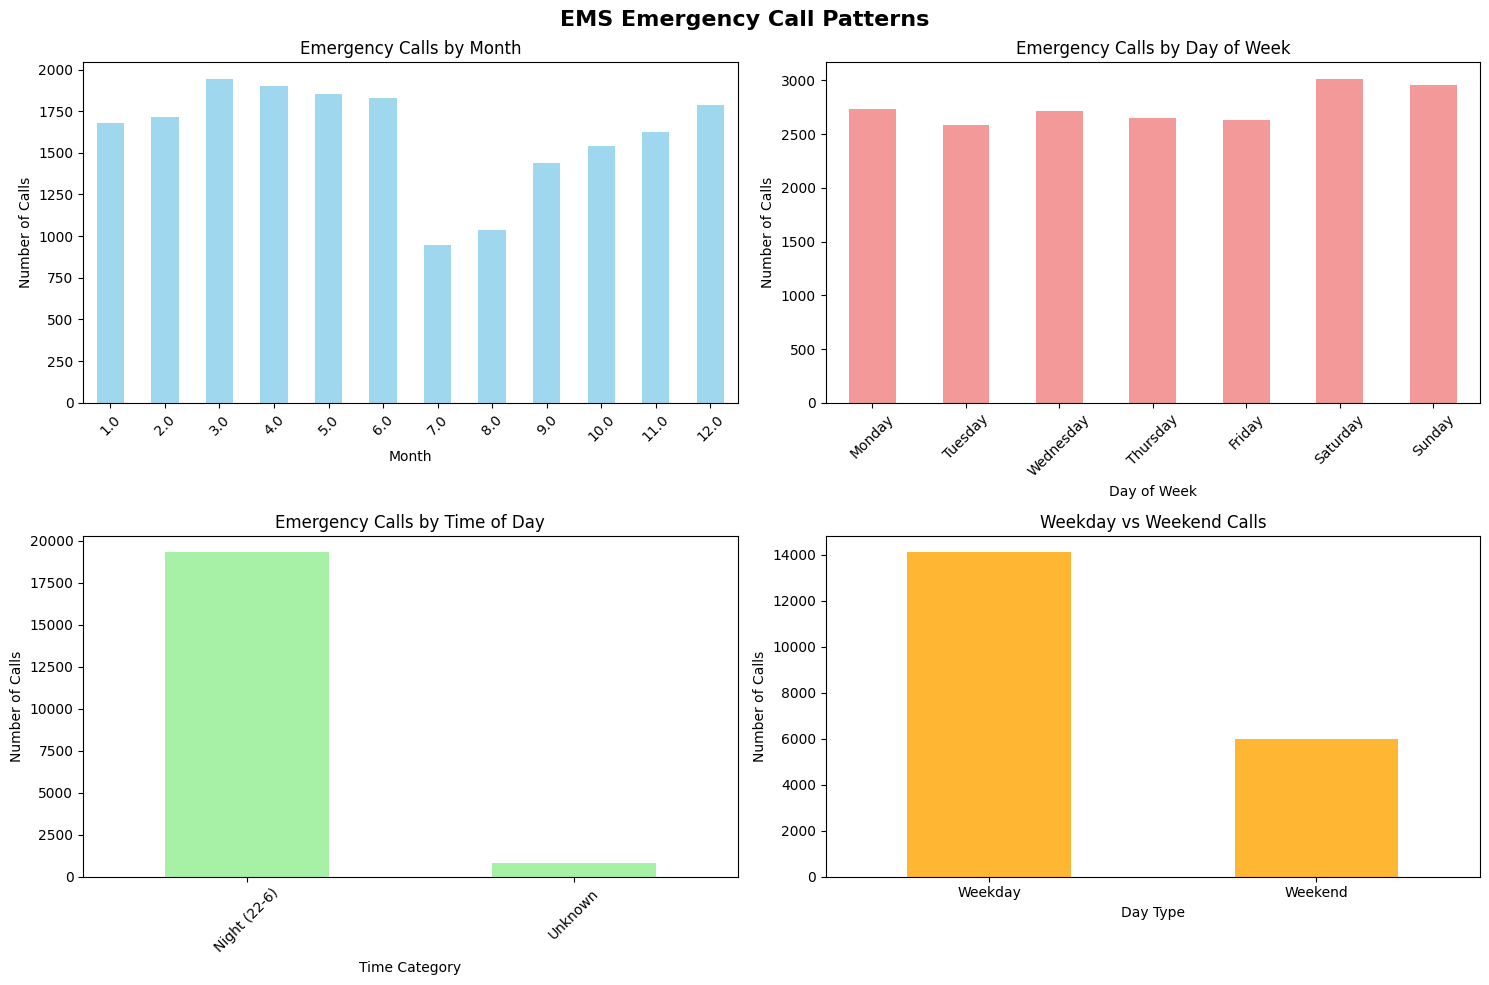

In [10]:
# =====================================
# STEP 3: VISUALIZATION - TEMPORAL
# =====================================

# Create temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('EMS Emergency Call Patterns', fontsize=16, fontweight='bold')

# Monthly trend
monthly_counts.plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Emergency Calls by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Number of Calls')
axes[0,0].tick_params(axis='x', rotation=45)

# Daily pattern
daily_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts.reindex(daily_order).plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('Emergency Calls by Day of Week')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Number of Calls')
axes[0,1].tick_params(axis='x', rotation=45)

# Time categories
time_counts.plot(kind='bar', ax=axes[1,0], color='lightgreen', alpha=0.8)
axes[1,0].set_title('Emergency Calls by Time of Day')
axes[1,0].set_xlabel('Time Category')
axes[1,0].set_ylabel('Number of Calls')
axes[1,0].tick_params(axis='x', rotation=45)

# Weekend vs Weekday
weekend_counts = df_cleaned['IS_WEEKEND'].value_counts()
weekend_labels = ['Weekday', 'Weekend']
weekend_counts.index = weekend_labels
weekend_counts.plot(kind='bar', ax=axes[1,1], color='orange', alpha=0.8)
axes[1,1].set_title('Weekday vs Weekend Calls')
axes[1,1].set_xlabel('Day Type')
axes[1,1].set_ylabel('Number of Calls')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [11]:
# =====================================
# STEP 4: GEOGRAPHIC ANALYSIS
# =====================================

print(f"\n🗺️ GEOGRAPHIC PATTERNS:")
print("-" * 30)

# District analysis
district_counts = df_cleaned['EVENT DISTRICT'].value_counts()
print(f"Emergency Calls by District:")
for district, count in district_counts.items():
    percentage = (count / district_counts.sum()) * 100
    print(f"   • {district}: {count:,} calls ({percentage:.1f}%)")

# Top sectors
sector_counts = df_cleaned['EVENT SECTOR'].value_counts().head(10)
print(f"\nTop 10 Sectors by Emergency Calls:")
for i, (sector, count) in enumerate(sector_counts.items(), 1):
    print(f"   {i:2d}. {sector}: {count:,} calls")


🗺️ GEOGRAPHIC PATTERNS:
------------------------------
Emergency Calls by District:
   • Gasabo: 6,786 calls (35.1%)
   • Nyarugenge: 5,335 calls (27.6%)
   • Kicukiro: 5,268 calls (27.3%)
   • Kamonyi: 875 calls (4.5%)
   • Rwamagana: 115 calls (0.6%)
   • Musanze: 99 calls (0.5%)
   • Bugesera: 88 calls (0.5%)
   • Huye: 81 calls (0.4%)
   • Rubavu: 66 calls (0.3%)
   • Muhanga: 56 calls (0.3%)
   • Nyanza: 42 calls (0.2%)
   • Karongi: 42 calls (0.2%)
   • Nyamagabe: 40 calls (0.2%)
   • Rulindo: 39 calls (0.2%)
   • Nyagatare: 36 calls (0.2%)
   • Gicumbi: 35 calls (0.2%)
   • Gakenke: 34 calls (0.2%)
   • Gatsibo: 33 calls (0.2%)
   • Kayonza: 33 calls (0.2%)
   • Nyamasheke: 28 calls (0.1%)
   • Ngoma: 27 calls (0.1%)
   • Kirehe: 22 calls (0.1%)
   • Rusizi: 22 calls (0.1%)
   • Rutsiro: 21 calls (0.1%)
   • Ngororero: 20 calls (0.1%)
   • Nyaruguru: 18 calls (0.1%)
   • Ruhango: 16 calls (0.1%)
   • Nyabihu: 13 calls (0.1%)
   • Gisagara: 9 calls (0.0%)
   • Burera: 8 calls (0

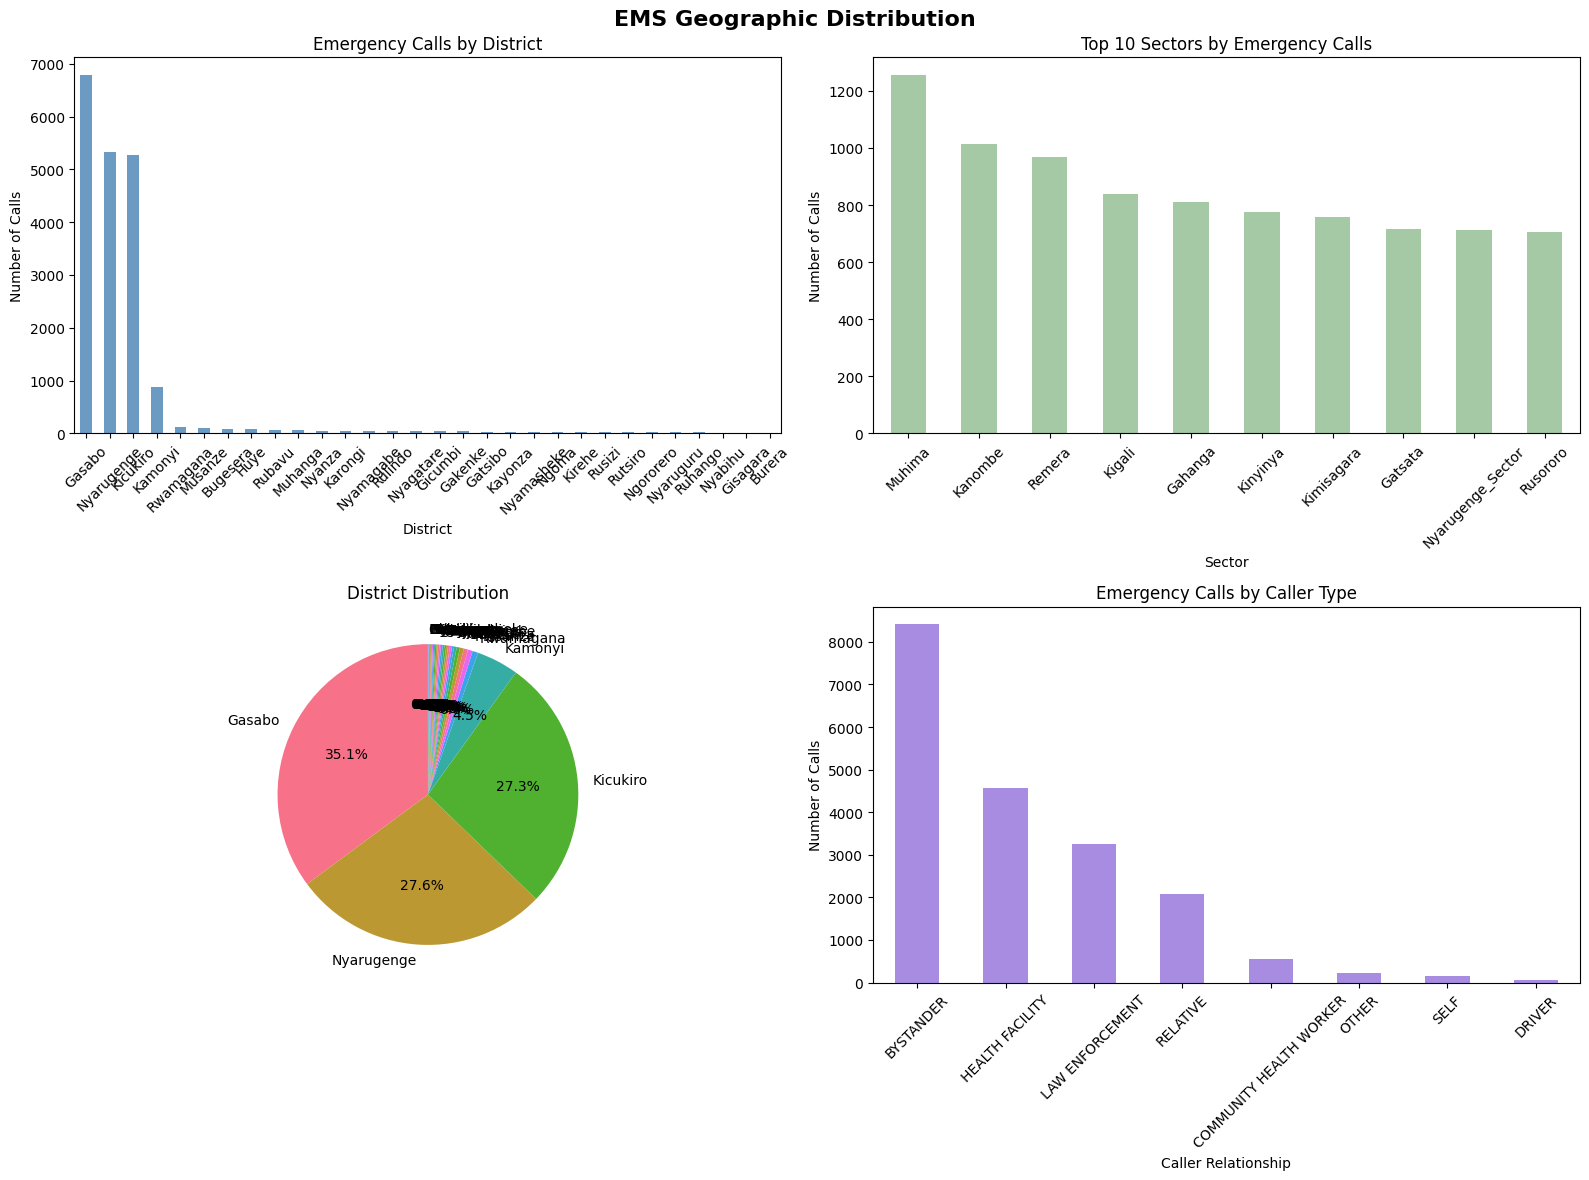

In [12]:
# =====================================
# STEP 5: GEOGRAPHIC VISUALIZATION
# =====================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('EMS Geographic Distribution', fontsize=16, fontweight='bold')

# District distribution
district_counts.plot(kind='bar', ax=axes[0,0], color='steelblue', alpha=0.8)
axes[0,0].set_title('Emergency Calls by District')
axes[0,0].set_xlabel('District')
axes[0,0].set_ylabel('Number of Calls')
axes[0,0].tick_params(axis='x', rotation=45)

# Top sectors
sector_counts.plot(kind='bar', ax=axes[0,1], color='darkseagreen', alpha=0.8)
axes[0,1].set_title('Top 10 Sectors by Emergency Calls')
axes[0,1].set_xlabel('Sector')
axes[0,1].set_ylabel('Number of Calls')
axes[0,1].tick_params(axis='x', rotation=45)

# District pie chart
district_counts.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('District Distribution')
axes[1,0].set_ylabel('')

# Caller relationship distribution
caller_counts = df_cleaned['CALLER RELATIONSHIP'].value_counts()
caller_counts.plot(kind='bar', ax=axes[1,1], color='mediumpurple', alpha=0.8)
axes[1,1].set_title('Emergency Calls by Caller Type')
axes[1,1].set_xlabel('Caller Relationship')
axes[1,1].set_ylabel('Number of Calls')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# =====================================
# STEP 6: OPERATIONAL ANALYSIS
# =====================================

print(f"\n🚨 OPERATIONAL INSIGHTS:")
print("-" * 30)

# Severity distribution
severity_counts = df_cleaned['INTERVENTION CLASSIFICATION'].value_counts()
print(f"Intervention Severity Distribution:")
for severity, count in severity_counts.items():
    percentage = (count / severity_counts.sum()) * 100
    print(f"   • {severity}: {count:,} cases ({percentage:.1f}%)")

# Caller relationship patterns
caller_counts = df_cleaned['CALLER RELATIONSHIP'].value_counts()
print(f"\nCaller Relationship Patterns:")
for caller, count in caller_counts.items():
    percentage = (count / caller_counts.sum()) * 100
    print(f"   • {caller}: {count:,} calls ({percentage:.1f}%)")

# Law enforcement involvement
law_counts = df_cleaned['LAW ENFORCEMENT'].value_counts()
print(f"\nLaw Enforcement Involvement:")
for involvement, count in law_counts.items():
    percentage = (count / law_counts.sum()) * 100
    status = "Involved" if involvement == 'Y' else "Not Involved"
    print(f"   • {status}: {count:,} cases ({percentage:.1f}%)")

# Completion rates
completion_counts = df_cleaned['COMPLETE'].value_counts()
print(f"\nIntervention Completion:")
for status, count in completion_counts.items():
    percentage = (count / completion_counts.sum()) * 100
    completion_status = "Completed" if status == 'Y' else "Not Completed"
    print(f"   • {completion_status}: {count:,} cases ({percentage:.1f}%)")


🚨 OPERATIONAL INSIGHTS:
------------------------------
Intervention Severity Distribution:
   • Moderate: 11,939 cases (67.5%)
   • Minor: 4,138 cases (23.4%)
   • Severe: 1,307 cases (7.4%)
   • Deceased: 305 cases (1.7%)
   • Maderate: 1 cases (0.0%)
   • On Site: 1 cases (0.0%)

Caller Relationship Patterns:
   • BYSTANDER: 8,409 calls (43.6%)
   • HEALTH FACILITY: 4,574 calls (23.7%)
   • LAW ENFORCEMENT: 3,254 calls (16.9%)
   • RELATIVE: 2,067 calls (10.7%)
   • COMMUNITY HEALTH WORKER: 563 calls (2.9%)
   • OTHER: 227 calls (1.2%)
   • SELF: 147 calls (0.8%)
   • DRIVER: 66 calls (0.3%)

Law Enforcement Involvement:
   • Not Involved: 16,477 cases (85.4%)
   • Involved: 2,825 cases (14.6%)

Intervention Completion:
   • Completed: 17,858 cases (98.0%)
   • Not Completed: 369 cases (2.0%)
   • Not Completed: 1 cases (0.0%)
   • Not Completed: 1 cases (0.0%)
   • Not Completed: 1 cases (0.0%)


In [14]:
# =====================================
# STEP 7: KEY PERFORMANCE INDICATORS
# =====================================

print(f"\n📈 KEY PERFORMANCE INDICATORS:")
print("-" * 30)

# Calculate KPIs
completion_rate = (df_cleaned['COMPLETE'] == 'Y').sum() / df_cleaned['COMPLETE'].notna().sum() * 100
law_involvement_rate = (df_cleaned['LAW ENFORCEMENT'] == 'Y').sum() / df_cleaned['LAW ENFORCEMENT'].notna().sum() * 100
multi_phone_rate = df_cleaned['HAS_MULTIPLE_PHONES'].sum() / len(df_cleaned) * 100

# Severity rates
total_classified = df_cleaned['INTERVENTION CLASSIFICATION'].notna().sum()
severe_rate = (df_cleaned['INTERVENTION CLASSIFICATION'] == 'Severe').sum() / total_classified * 100
deceased_rate = (df_cleaned['INTERVENTION CLASSIFICATION'] == 'Deceased').sum() / total_classified * 100

print(f"🎯 SYSTEM PERFORMANCE:")
print(f"   • Intervention Completion Rate: {completion_rate:.1f}%")
print(f"   • Severe Cases Rate: {severe_rate:.1f}%")
print(f"   • Fatality Rate: {deceased_rate:.1f}%")
print(f"   • Law Enforcement Involvement: {law_involvement_rate:.1f}%")

print(f"\n📞 COMMUNICATION METRICS:")
print(f"   • Multi-phone Contact Rate: {multi_phone_rate:.1f}%")

# Peak activity
peak_month = monthly_counts.idxmax()
peak_day = daily_counts.idxmax()
busiest_district = district_counts.idxmax()

print(f"\n⚡ PEAK ACTIVITY:")
print(f"   • Peak Month: {pd.to_datetime(f'2023-{int(peak_month):02d}-01').strftime('%B')}")
print(f"   • Peak Day: {peak_day}")
print(f"   • Busiest District: {busiest_district}")

print(f"\n✅ Analysis Complete!")
print(f"📊 Your EMS system handled {total_records:,} emergency calls over 12 months")
print(f"🚑 Average: {total_records/365:.0f} calls per day")


📈 KEY PERFORMANCE INDICATORS:
------------------------------
🎯 SYSTEM PERFORMANCE:
   • Intervention Completion Rate: 98.0%
   • Severe Cases Rate: 7.4%
   • Fatality Rate: 1.7%
   • Law Enforcement Involvement: 14.6%

📞 COMMUNICATION METRICS:
   • Multi-phone Contact Rate: 4.5%

⚡ PEAK ACTIVITY:
   • Peak Month: March
   • Peak Day: Saturday
   • Busiest District: Gasabo

✅ Analysis Complete!
📊 Your EMS system handled 20,091 emergency calls over 12 months
🚑 Average: 55 calls per day


🔍 INVESTIGATING TIME DATA ISSUE
1. RAW HOUR DATA ANALYSIS:
------------------------------
Hour field data type: object
Hour_numeric data type: float64

Hour_numeric statistics:
count    19305.000000
mean         0.576875
std          0.269192
min          0.000000
25%          0.383333
50%          0.597917
75%          0.804861
max          1.103472
Name: HOUR_NUMERIC, dtype: float64

Sample of HOUR vs HOUR_NUMERIC:
        HOUR  HOUR_NUMERIC TIME_OF_DAY TIME_CATEGORY
0   0.029167      0.029167       00:01  Night (22-6)
1   0.054861      0.054861       00:03  Night (22-6)
2    0.05625      0.056250       00:03  Night (22-6)
3   0.065278      0.065278       00:03  Night (22-6)
4   0.098611      0.098611       00:05  Night (22-6)
5    0.13125      0.131250       00:07  Night (22-6)
6   0.202083      0.202083       00:12  Night (22-6)
7   0.308333      0.308333       00:18  Night (22-6)
8   0.318056      0.318056       00:19  Night (22-6)
9   0.377083      0.377083       00:22  Night (22

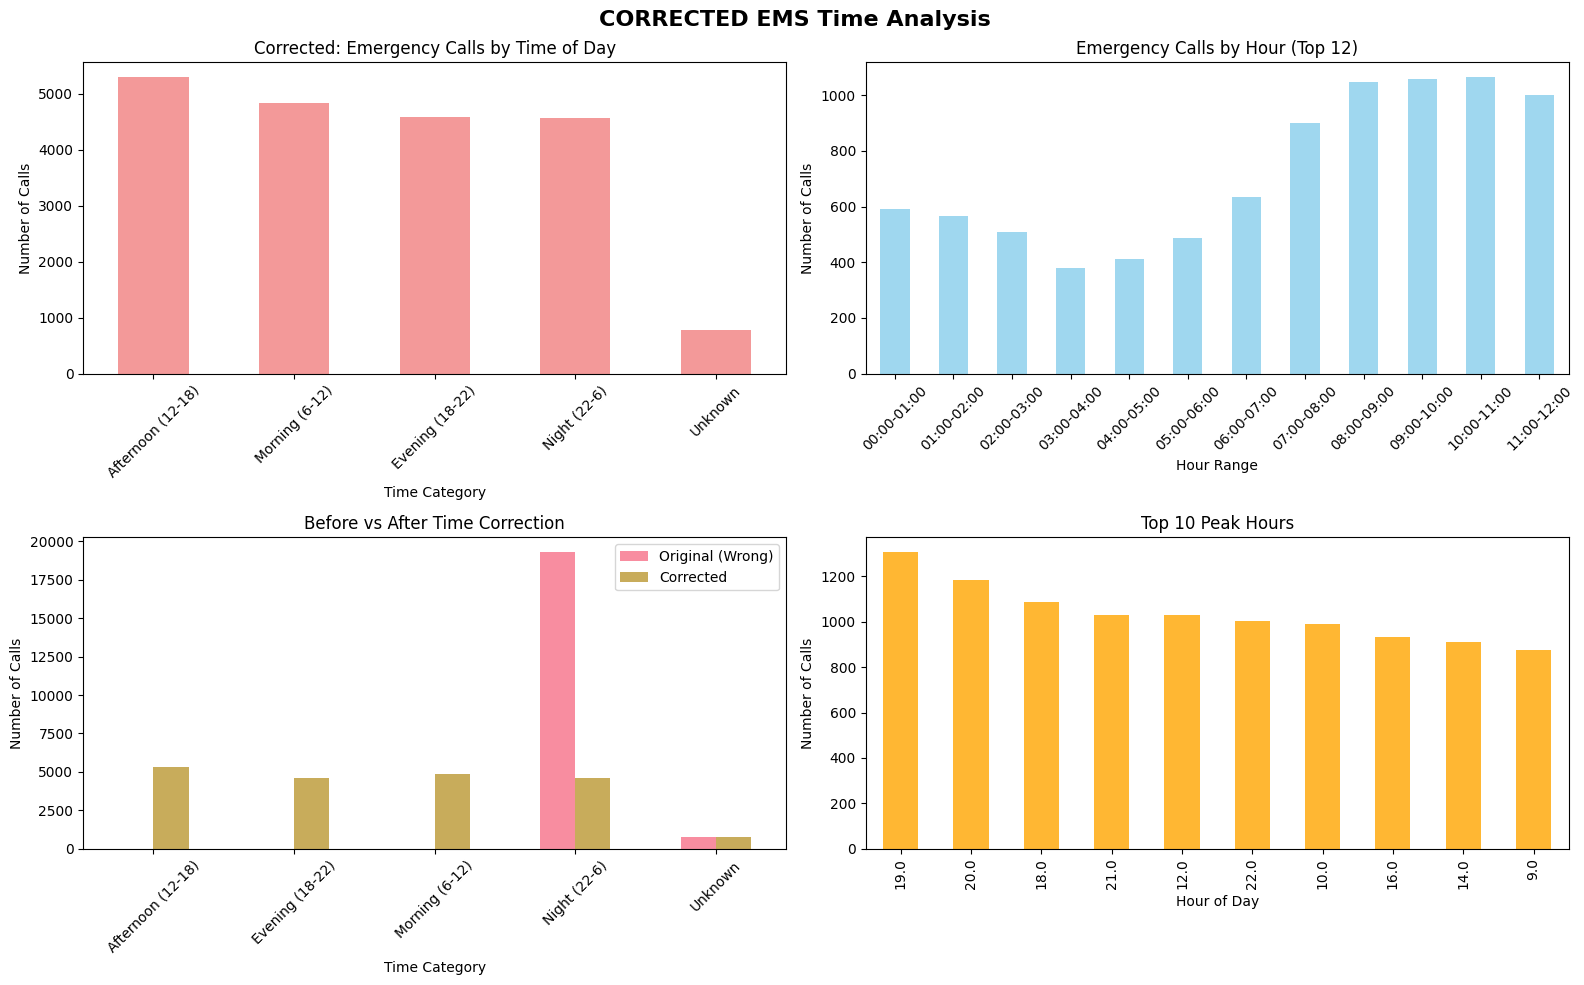


✅ CORRECTED KEY INSIGHTS:
------------------------------
🕐 PEAK ACTIVITY (Corrected):
   • Peak Hour: 12:00
   • Peak Time Period: Afternoon (12-18)

📊 TIME DISTRIBUTION (Corrected):
   • Afternoon (12-18): 26.4%
   • Morning (6-12): 24.1%
   • Evening (18-22): 22.8%
   • Night (22-6): 22.8%
   • Unknown: 3.9%

🔧 APPLYING CORRECTIONS TO MAIN DATASET...
✅ Time data has been corrected and updated!
🚑 You can now re-run temporal analysis with accurate time patterns.


In [15]:
# TIME DATA INVESTIGATION AND FIX
# Run this to diagnose and fix the time categorization issue

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("🔍 INVESTIGATING TIME DATA ISSUE")
print("=" * 50)

# 1. Examine raw hour data
print("1. RAW HOUR DATA ANALYSIS:")
print("-" * 30)
print(f"Hour field data type: {df_cleaned['HOUR'].dtype}")
print(f"Hour_numeric data type: {df_cleaned['HOUR_NUMERIC'].dtype}")

print(f"\nHour_numeric statistics:")
print(df_cleaned['HOUR_NUMERIC'].describe())

print(f"\nSample of HOUR vs HOUR_NUMERIC:")
sample_data = df_cleaned[['HOUR', 'HOUR_NUMERIC', 'TIME_OF_DAY', 'TIME_CATEGORY']].head(20)
print(sample_data.to_string())

# 2. Check the distribution of hour values
print(f"\n2. HOUR DISTRIBUTION:")
print("-" * 30)
hour_dist = df_cleaned['HOUR_NUMERIC'].value_counts().sort_index().head(24)
print("Most common hour values:")
print(hour_dist.head(10))

# 3. Investigate the time categorization logic
print(f"\n3. TIME CATEGORIZATION ISSUE:")
print("-" * 30)

# Check what's happening with the categorization
def debug_categorize_hour(hour):
    if pd.isna(hour):
        return 'Unknown'
    elif 6 <= hour < 12:
        return 'Morning (6-12)'
    elif 12 <= hour < 18:
        return 'Afternoon (12-18)'
    elif 18 <= hour < 22:
        return 'Evening (18-22)'
    else:
        return 'Night (22-6)'

# Test with sample values
test_hours = [0.029167, 0.054861, 0.05625, 0.065278, 0.098611, 12.5, 18.0, 23.0]
print("Testing categorization logic:")
for hour in test_hours:
    category = debug_categorize_hour(hour)
    print(f"Hour {hour:8.6f} -> {category}")

print(f"\n🚨 PROBLEM IDENTIFIED:")
print("Hours are stored as decimal fractions of a day, not hours!")
print("0.029167 = 0.029167 * 24 = 0.7 hours = 42 minutes past midnight")
print("Need to multiply by 24 to get actual hours.")

# 4. CREATE CORRECTED TIME ANALYSIS
print(f"\n4. CORRECTED TIME ANALYSIS:")
print("-" * 30)

# Fix the hour calculation
df_cleaned['HOUR_CORRECTED'] = df_cleaned['HOUR_NUMERIC'] * 24

# Recalculate time categories with corrected hours
def correct_categorize_hour(hour_decimal):
    if pd.isna(hour_decimal):
        return 'Unknown'
    
    hour_24 = hour_decimal * 24  # Convert decimal day to hours
    
    if 6 <= hour_24 < 12:
        return 'Morning (6-12)'
    elif 12 <= hour_24 < 18:
        return 'Afternoon (12-18)'
    elif 18 <= hour_24 < 22:
        return 'Evening (18-22)'
    else:
        return 'Night (22-6)'

df_cleaned['TIME_CATEGORY_CORRECTED'] = df_cleaned['HOUR_NUMERIC'].apply(correct_categorize_hour)

# Show corrected time distribution
corrected_time_dist = df_cleaned['TIME_CATEGORY_CORRECTED'].value_counts()
print("CORRECTED Time of Day Patterns:")
for time_cat, count in corrected_time_dist.items():
    percentage = (count / corrected_time_dist.sum()) * 100
    print(f"   • {time_cat}: {count:,} calls ({percentage:.1f}%)")

# 5. HOURLY DISTRIBUTION ANALYSIS
print(f"\n5. DETAILED HOURLY BREAKDOWN:")
print("-" * 30)

# Create hour bins for better analysis
df_cleaned['HOUR_BINS'] = pd.cut(df_cleaned['HOUR_CORRECTED'], 
                                bins=24, 
                                labels=[f"{i:02d}:00-{i+1:02d}:00" for i in range(24)])

hourly_counts = df_cleaned['HOUR_BINS'].value_counts().sort_index()
print("Calls by Hour of Day:")
for hour_bin, count in hourly_counts.head(12).items():
    print(f"   • {hour_bin}: {count:,} calls")

# 6. VISUALIZATION OF CORRECTED DATA
print(f"\n6. CREATING CORRECTED VISUALIZATIONS...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('CORRECTED EMS Time Analysis', fontsize=16, fontweight='bold')

# Corrected time categories
corrected_time_dist.plot(kind='bar', ax=axes[0,0], color='lightcoral', alpha=0.8)
axes[0,0].set_title('Corrected: Emergency Calls by Time of Day')
axes[0,0].set_xlabel('Time Category')
axes[0,0].set_ylabel('Number of Calls')
axes[0,0].tick_params(axis='x', rotation=45)

# Hourly distribution (top 12 hours)
hourly_counts.head(12).plot(kind='bar', ax=axes[0,1], color='skyblue', alpha=0.8)
axes[0,1].set_title('Emergency Calls by Hour (Top 12)')
axes[0,1].set_xlabel('Hour Range')
axes[0,1].set_ylabel('Number of Calls')
axes[0,1].tick_params(axis='x', rotation=45)

# Before vs After comparison
comparison_data = pd.DataFrame({
    'Original (Wrong)': df_cleaned['TIME_CATEGORY'].value_counts(),
    'Corrected': df_cleaned['TIME_CATEGORY_CORRECTED'].value_counts()
})
comparison_data.plot(kind='bar', ax=axes[1,0], alpha=0.8)
axes[1,0].set_title('Before vs After Time Correction')
axes[1,0].set_xlabel('Time Category')
axes[1,0].set_ylabel('Number of Calls')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend()

# Peak hours identification
peak_hours = df_cleaned.groupby(df_cleaned['HOUR_CORRECTED'].round())['HOUR_CORRECTED'].count().sort_values(ascending=False).head(10)
peak_hours.plot(kind='bar', ax=axes[1,1], color='orange', alpha=0.8)
axes[1,1].set_title('Top 10 Peak Hours')
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Number of Calls')

plt.tight_layout()
plt.show()

# 7. SUMMARY OF CORRECTED INSIGHTS
print(f"\n✅ CORRECTED KEY INSIGHTS:")
print("-" * 30)

peak_hour = df_cleaned['HOUR_CORRECTED'].mode().iloc[0]
peak_time_category = corrected_time_dist.idxmax()

print(f"🕐 PEAK ACTIVITY (Corrected):")
print(f"   • Peak Hour: {peak_hour:.0f}:00")
print(f"   • Peak Time Period: {peak_time_category}")

print(f"\n📊 TIME DISTRIBUTION (Corrected):")
for time_cat, count in corrected_time_dist.items():
    percentage = (count / corrected_time_dist.sum()) * 100
    print(f"   • {time_cat}: {percentage:.1f}%")

# Update the main dataframe with corrected values
print(f"\n🔧 APPLYING CORRECTIONS TO MAIN DATASET...")
df_cleaned['TIME_CATEGORY'] = df_cleaned['TIME_CATEGORY_CORRECTED']
df_cleaned['HOUR_24FORMAT'] = df_cleaned['HOUR_CORRECTED']

print("✅ Time data has been corrected and updated!")
print("🚑 You can now re-run temporal analysis with accurate time patterns.")

In [16]:
print(df_cleaned.columns)


Index(['DATE', 'HOUR', 'PATIENT CODE', 'CALLER PHONE NUMBER',
       'CALLER RELATIONSHIP', 'EVENT DISTRICT', 'EVENT SECTOR', 'EVENT CELL',
       'EVENT VILLAGE', 'INTERVENTION SITE/QUARTIER', 'EVENT STREET NUMBER',
       'EVENT TYPE', 'CIRCUMSTANCE', 'EVENT DETAILS/INFORMATIO REQUESTED',
       'TIME TEAM ALERTED', 'TEAM TO LEAVE', 'TIME TEAM ON SCENE',
       'NOTICE TO HF', 'TIME TO LEAVE SCENE', 'TIME TEAM AT HF',
       'TIME TO HANDOVER', 'INITIAL ASSESSMENT', 'RECEIVING HF',
       'TYPE OF FACILITY', 'SECONDARY TRANSFER? ', 'OPERATION SITE',
       'STAFF IN INTERVENTION', 'LEAD DISPATCHER',
       'OTHER DISPATCHER TEAM MEMBERS', 'RESPONDER', 'RESPONSE PROVIDED',
       'INTERVENTION CLASSIFICATION', 'LAW ENFORCEMENT',
       'COMMENTS/REASON FOR INCOMPLETE INTERVENTION/INFORMATION PROVIDED',
       'COMPLETE', 'HOUR_NUMERIC', 'TIME_OF_DAY', 'LAW_ENFORCEMENT_BOOL',
       'COMPLETE_BOOL', 'PRIMARY_PHONE', 'HAS_MULTIPLE_PHONES', 'YEAR',
       'MONTH', 'DAY', 'WEEKDAY', 'IS_W

# ================================================================================================
# MACHINE LEARNING APPLICATIONS FOR EMS ANALYSIS - COMPLETE IMPLEMENTATION
# Comprehensive ML implementation with trend analysis and visualizations
# ================================================================================================

# ====================================================================
# SECTION 1: TIME SERIES ANALYSIS
# ====================================================================
    


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Time Series Libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Deep Learning (simplified version without TensorFlow for compatibility)
import numpy as np

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

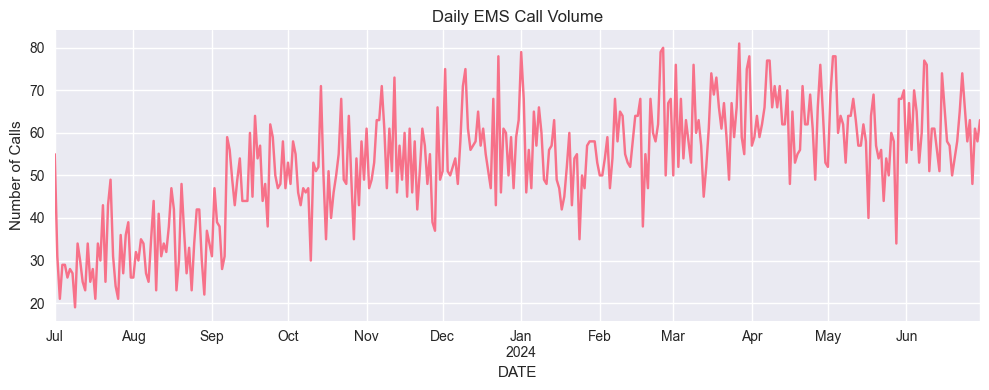

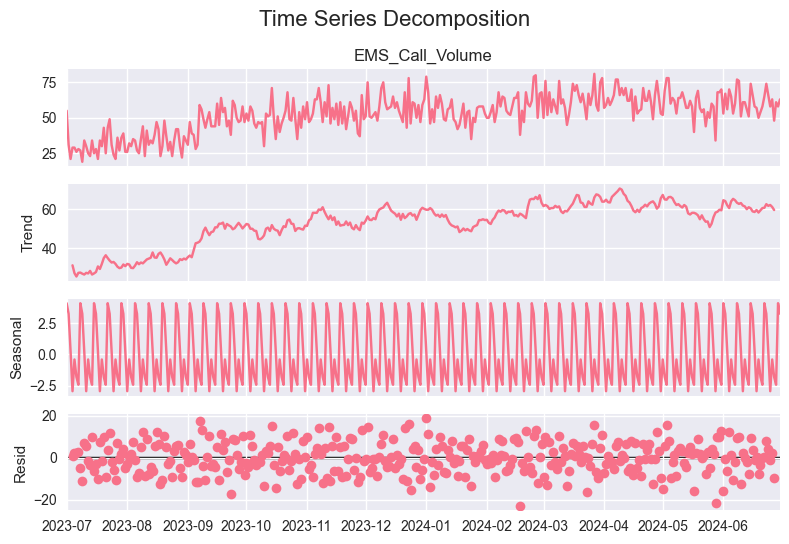


📌 ADF Test on EMS_Call_Volume:
ADF Statistic: -2.441040767791757
p-value: 0.13048631466278782
Critical Values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
=> Not Stationary (fail to reject H0)


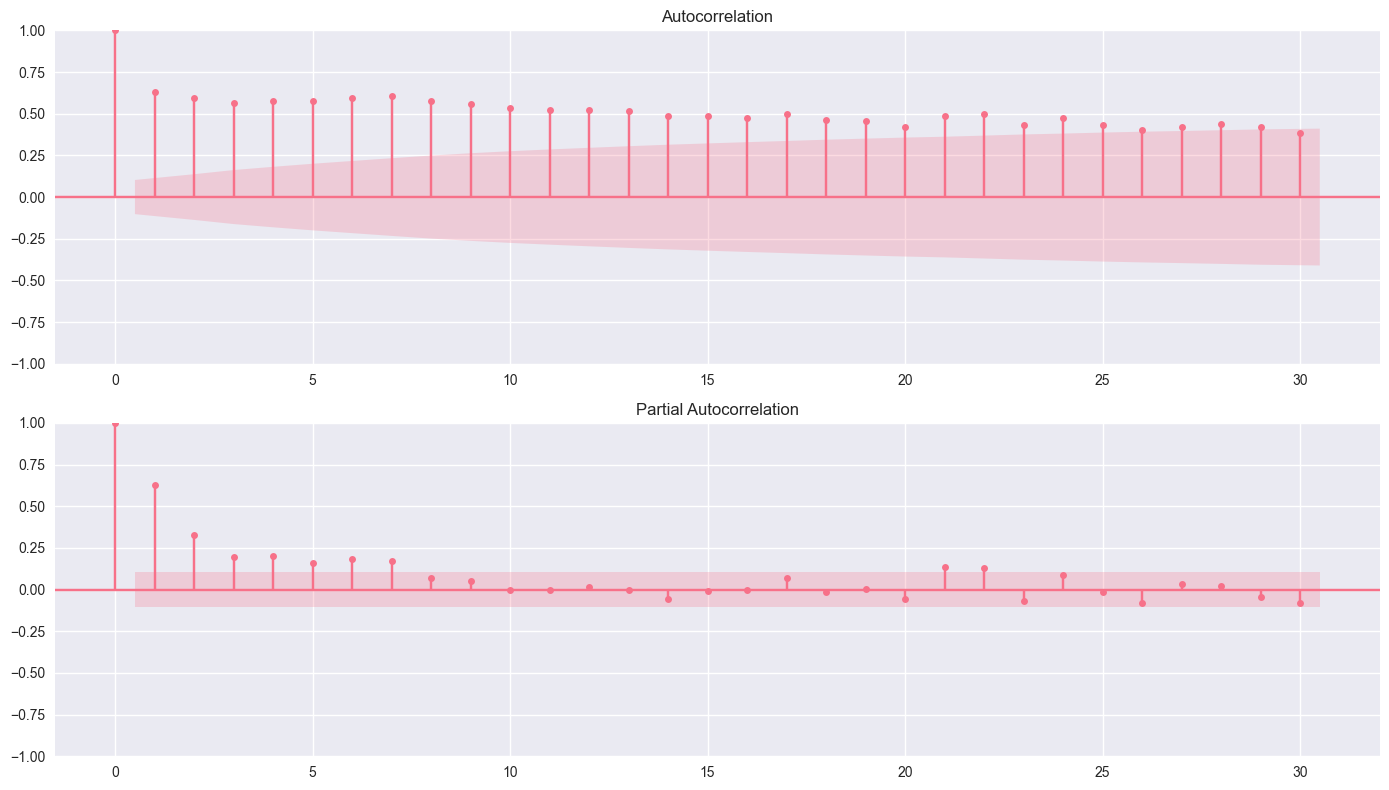


✅ Random Forest RMSE: 9.84
✅ XGBoost RMSE: 10.34


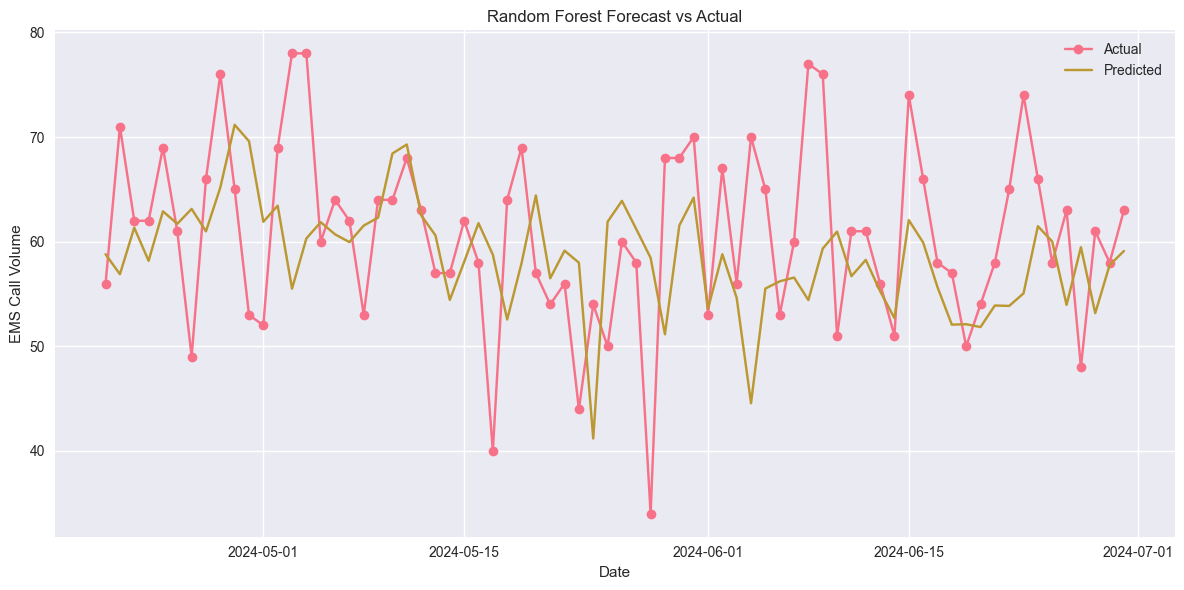

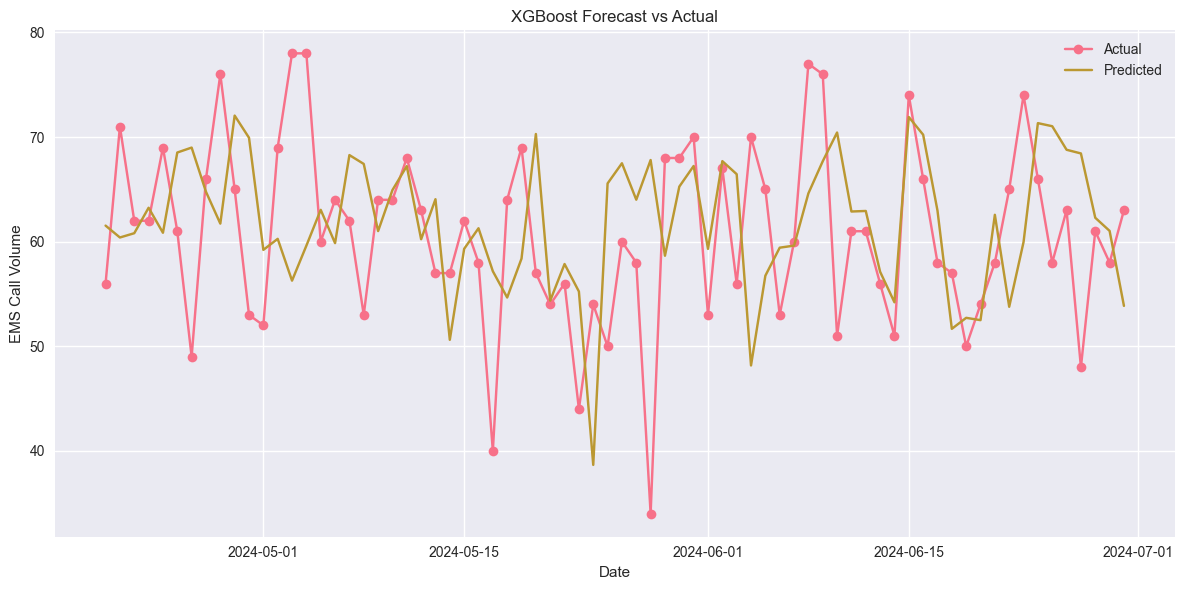


📊 Forecast Summary (first 10 rows):


,Actual,RF_Predicted,XGB_Predicted
Date,,,
2024-04-20,56,58.80,61.535713
2024-04-21,71,56.89,60.400162
2024-04-22,62,61.34,60.808804
2024-04-23,62,58.17,63.241657
2024-04-24,69,62.90,60.851883
2024-04-25,61,61.71,68.521408
2024-04-26,49,63.13,68.993256
2024-04-27,66,60.99,64.771805
2024-04-28,76,65.18,61.725853


1109940

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
from datetime import timedelta

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Jupyter inline display
%matplotlib inline
warnings.filterwarnings("ignore")

# Use your cleaned dataset
ems_data = df_cleaned.copy()

# 1. Ensure datetime format
ems_data['DATE'] = pd.to_datetime(ems_data['DATE'])

# 2. Aggregate call volume per day
daily_calls = ems_data.groupby('DATE').size().reset_index(name='EMS_Call_Volume')
daily_calls.set_index('DATE', inplace=True)

# 3. Plot raw time series
plt.figure(figsize=(10, 4))
daily_calls['EMS_Call_Volume'].plot(title='Daily EMS Call Volume', grid=True)
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()

# 4. Time series decomposition
decomposition = sm.tsa.seasonal_decompose(daily_calls['EMS_Call_Volume'], model='additive')
decomposition.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

# 5. ADF test for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("=> Stationary (reject H0)")
    else:
        print("=> Not Stationary (fail to reject H0)")

print("\n📌 ADF Test on EMS_Call_Volume:")
test_stationarity(daily_calls['EMS_Call_Volume'])

# 6. ACF & PACF
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(daily_calls['EMS_Call_Volume'], lags=30, ax=ax[0])
plot_pacf(daily_calls['EMS_Call_Volume'], lags=30, ax=ax[1])
plt.tight_layout()
plt.show()

# 7. Feature Engineering
daily_calls['DayOfWeek'] = daily_calls.index.dayofweek
daily_calls['Month'] = daily_calls.index.month
daily_calls['Day'] = daily_calls.index.day
daily_calls['Year'] = daily_calls.index.year
daily_calls['Lag1'] = daily_calls['EMS_Call_Volume'].shift(1)
daily_calls['Lag7'] = daily_calls['EMS_Call_Volume'].shift(7)
daily_calls.dropna(inplace=True)

# 8. Define features and target
features = ['DayOfWeek', 'Month', 'Day', 'Year', 'Lag1', 'Lag7']
target = 'EMS_Call_Volume'

X = daily_calls[features]
y = daily_calls[target]

# 9. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 10. Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 11. Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# 12. RMSE Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print(f"\n✅ Random Forest RMSE: {rf_rmse:.2f}")
print(f"✅ XGBoost RMSE: {xgb_rmse:.2f}")

# 13. Forecast Plotting
def plot_forecast(y_true, preds, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true.index, y_true, label='Actual', marker='o')
    plt.plot(y_true.index, preds, label='Predicted', marker='x')
    plt.title(f'{model_name} Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('EMS Call Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_forecast(y_test, rf_preds, "Random Forest")
plot_forecast(y_test, xgb_preds, "XGBoost")

# 14. Summary
summary_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test.values,
    'RF_Predicted': rf_preds,
    'XGB_Predicted': xgb_preds
}).set_index('Date')

print("\n📊 Forecast Summary (first 10 rows):")
display(summary_df.head(10))

# 15. Cleanup
gc.collect()


# ================================================================================================
# 2. GEOGRAPHIC CLUSTERING ANALYSIS
# ================================================================================================

🗺️ Preparing geographic data for clustering...
✅ Geographic data prepared: 121 sectors
✅ Urban: 36, Rural: 85

📍 Top 5 Sectors by Call Volume:
  • Muhima (Nyarugenge): 1255 calls
  • Kanombe (Kicukiro): 1011 calls
  • Remera (Gasabo): 966 calls
  • Kigali (Nyarugenge): 840 calls
  • Gahanga (Kicukiro): 809 calls
🎯 Determining optimal number of clusters...


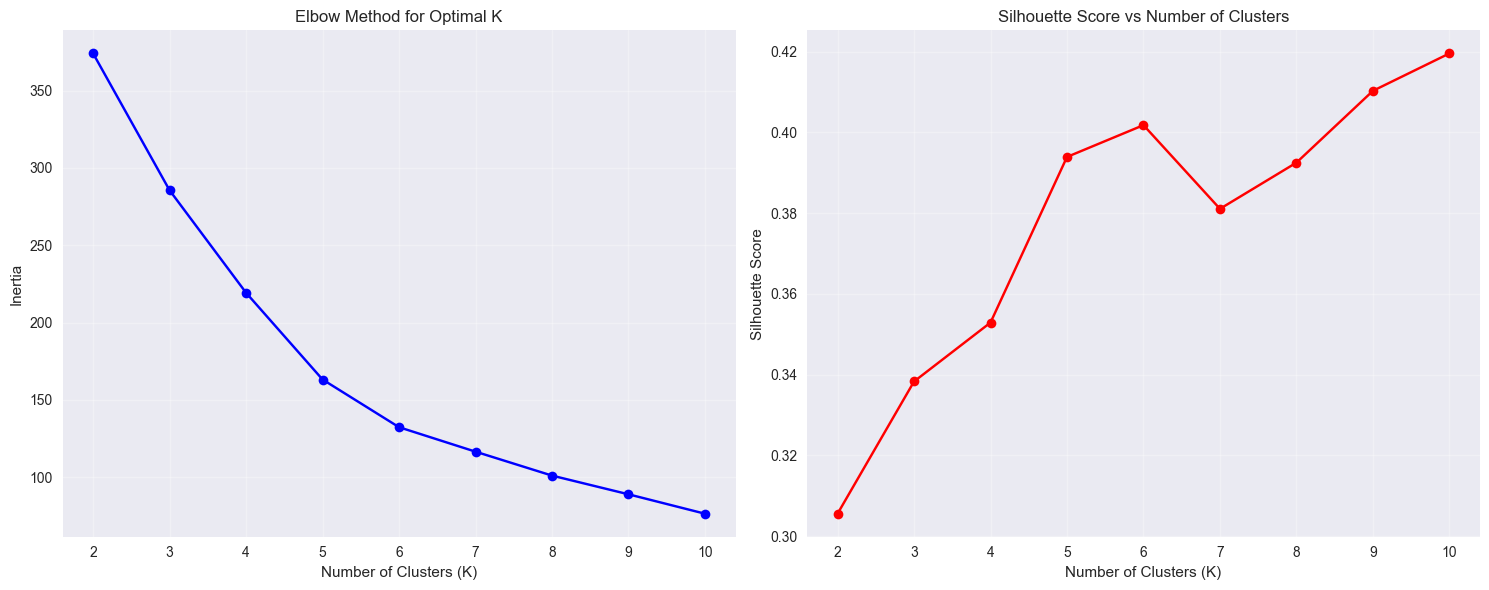

✅ Optimal number of clusters: 10
✅ Best silhouette score: 0.420
🎯 Performing K-means clustering...

📊 CLUSTERING ANALYSIS RESULTS:
------------------------------------------------------------

🎯 CLUSTER_0:
  • Sectors: 19
  • Total calls: 14005
  • Avg calls/sector: 737.1
  • Severity rate: 7.2%
  • Police involvement: 15.5%
  • Completion rate: 92.9%
  • Area mix: {'Urban': 18, 'Rural': 1}
  • Top sectors:
    - Muhima (Nyarugenge): 1255 calls
    - Kanombe (Kicukiro): 1011 calls
    - Remera (Gasabo): 966 calls

🎯 CLUSTER_1:
  • Sectors: 15
  • Total calls: 119
  • Avg calls/sector: 7.9
  • Severity rate: 8.2%
  • Police involvement: 1.6%
  • Completion rate: 69.9%
  • Area mix: {'Rural': 15}
  • Top sectors:
    - Byumba (Gicumbi): 23 calls
    - Ntarama (Bugesera): 15 calls
    - Mayange (Bugesera): 12 calls

🎯 CLUSTER_2:
  • Sectors: 20
  • Total calls: 198
  • Avg calls/sector: 9.9
  • Severity rate: 36.6%
  • Police involvement: 3.9%
  • Completion rate: 95.9%
  • Area mix: {'Ru

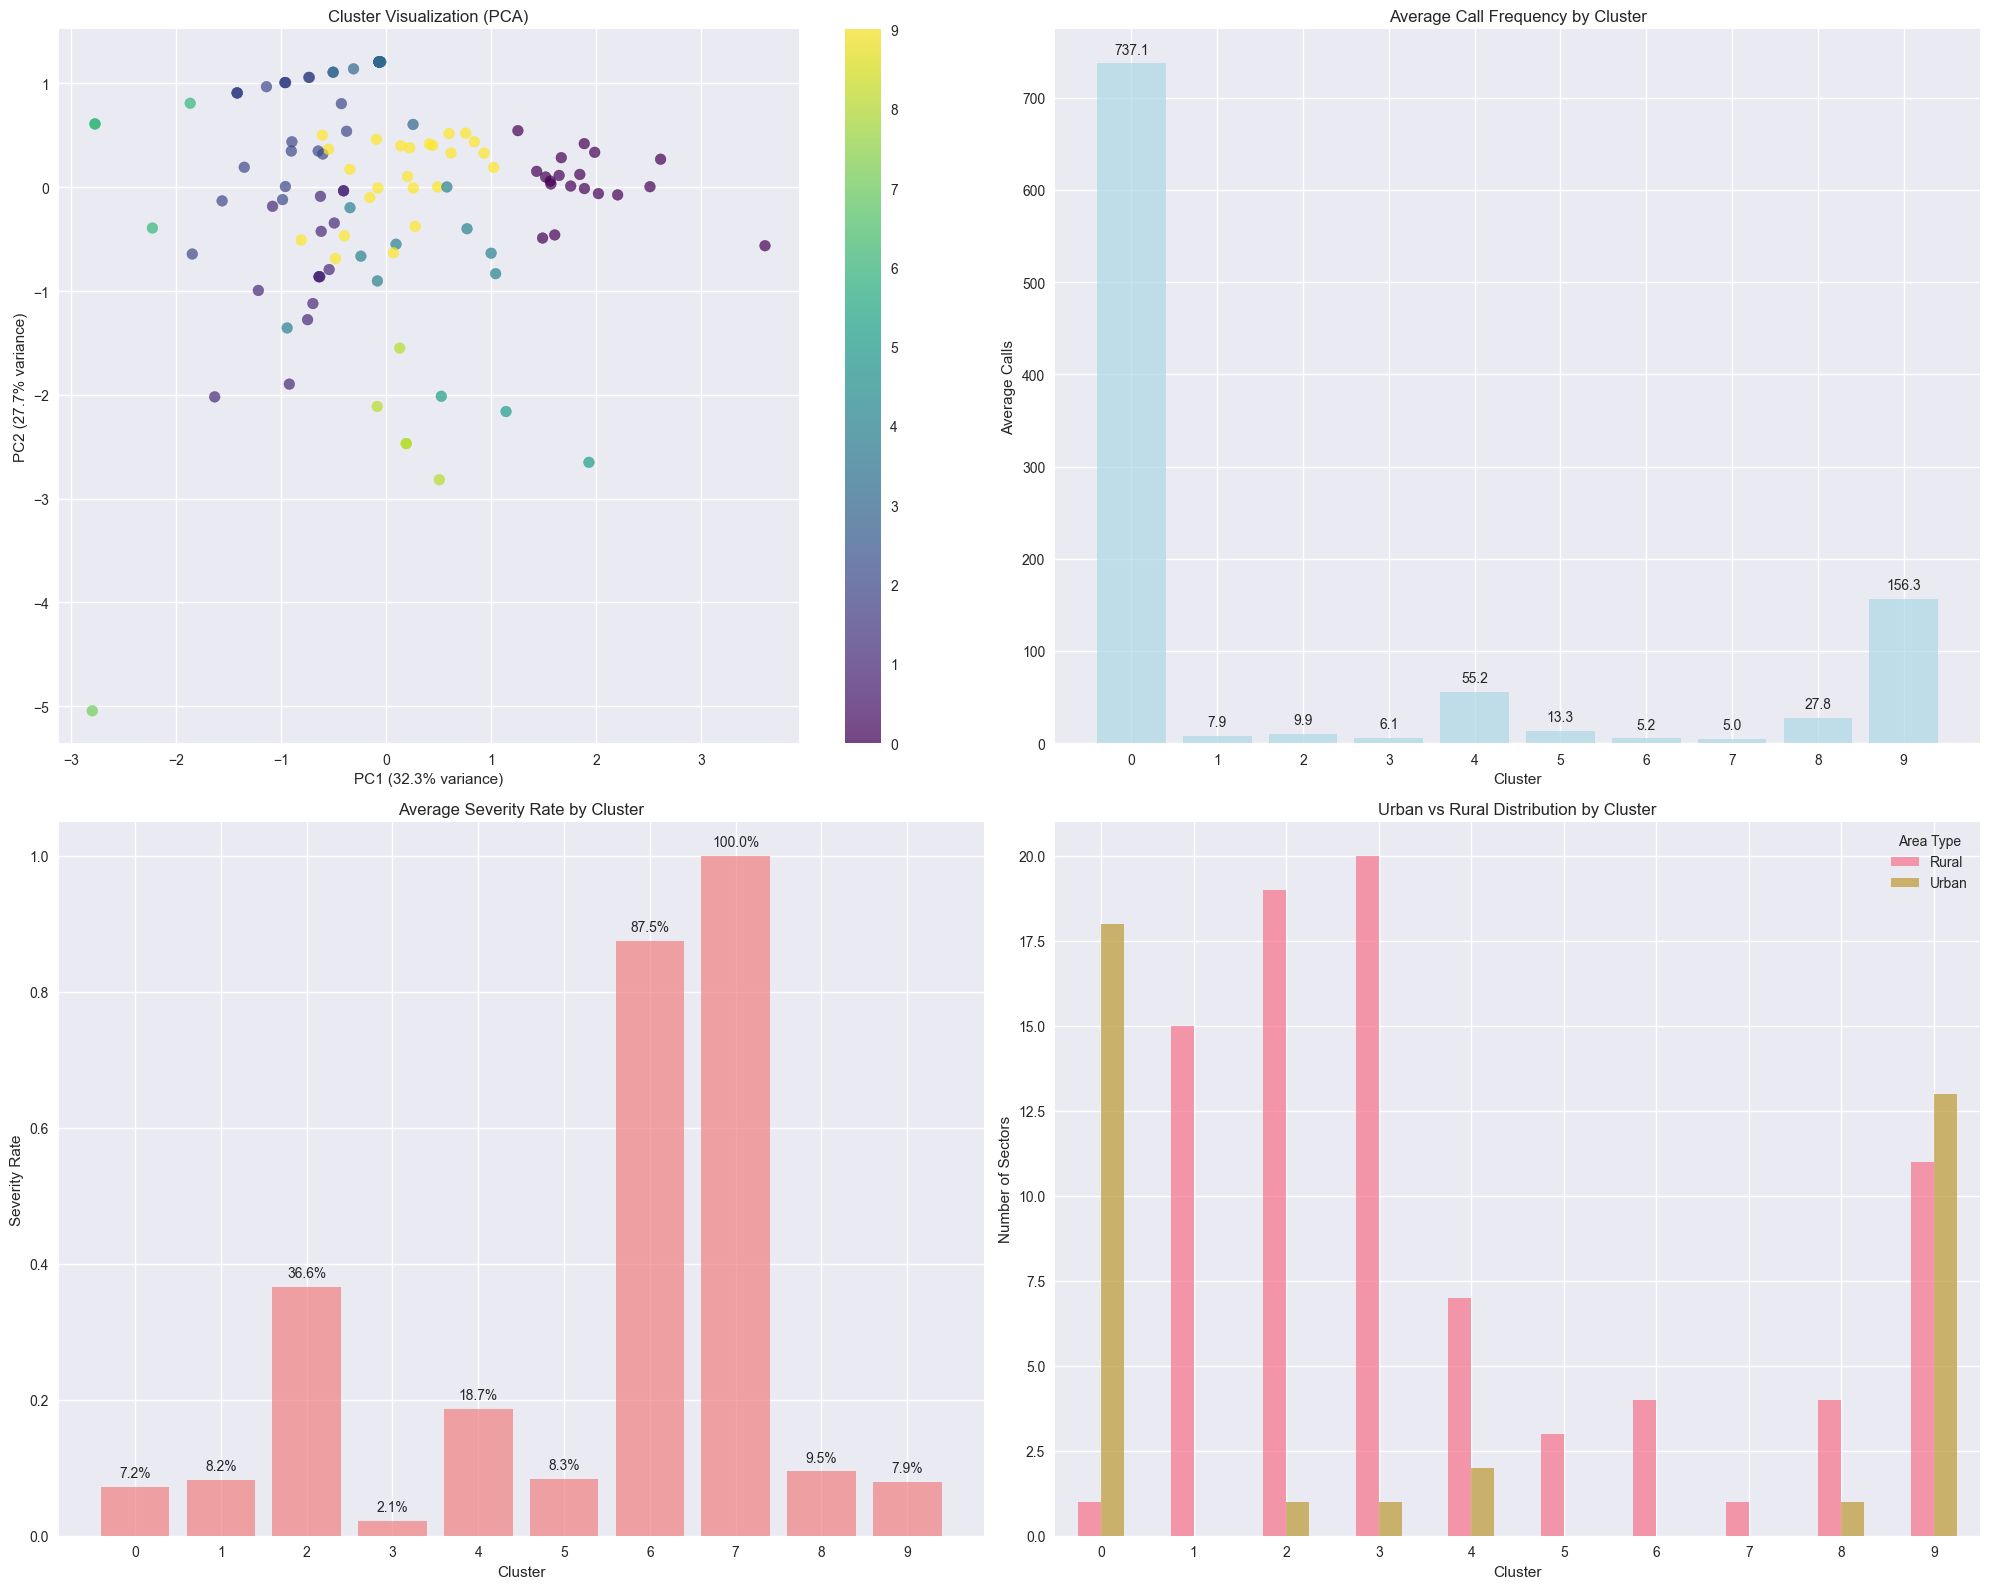

✅ Cluster visualization completed
🚑 Generating resource allocation recommendations...


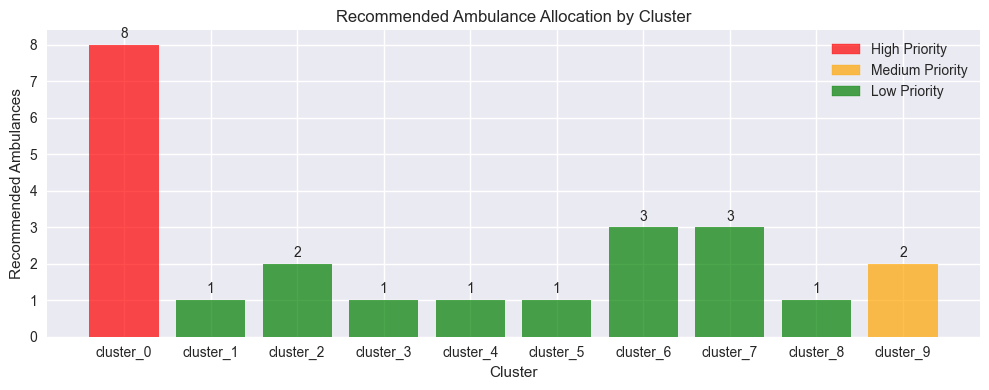


🚑 AMBULANCE ALLOCATION RECOMMENDATIONS:
------------------------------------------------------------

🎯 CLUSTER_0:
  • Priority: High
  • Recommended ambulances: 8
  • Call proportion: 74.1%
  • Total calls: 14005
  • Severity rate: 7.2%
  • Sectors covered: 19

🎯 CLUSTER_1:
  • Priority: Low
  • Recommended ambulances: 1
  • Call proportion: 0.6%
  • Total calls: 119
  • Severity rate: 8.2%
  • Sectors covered: 15

🎯 CLUSTER_2:
  • Priority: Low
  • Recommended ambulances: 2
  • Call proportion: 1.0%
  • Total calls: 198
  • Severity rate: 36.6%
  • Sectors covered: 20

🎯 CLUSTER_3:
  • Priority: Low
  • Recommended ambulances: 1
  • Call proportion: 0.7%
  • Total calls: 128
  • Severity rate: 2.1%
  • Sectors covered: 21

🎯 CLUSTER_4:
  • Priority: Low
  • Recommended ambulances: 1
  • Call proportion: 2.6%
  • Total calls: 497
  • Severity rate: 18.7%
  • Sectors covered: 9

🎯 CLUSTER_5:
  • Priority: Low
  • Recommended ambulances: 1
  • Call proportion: 0.2%
  • Total calls: 40


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



class EMSGeographicClustering:
    """
    Geographic clustering analysis for optimal ambulance positioning
    """

    def __init__(self, df_cleaned):
        self.df = df_cleaned.copy()
        self.results = {}

    def prepare_geographic_data(self):
        print("🗺️ Preparing geographic data for clustering...")

        # Filter valid geographic data
        df_geo = self.df[self.df['EVENT DISTRICT'].notna() & self.df['EVENT SECTOR'].notna()].copy()

        # Group and aggregate sector data
        sector_stats = df_geo.groupby(['EVENT DISTRICT', 'EVENT SECTOR']).agg(
            call_frequency=('DATE', 'count'),
            severe_cases=('INTERVENTION CLASSIFICATION', lambda x: (x == 'Severe').sum()),
            total_classified=('INTERVENTION CLASSIFICATION', 'count'),
            police_cases=('LAW ENFORCEMENT', lambda x: (x == 'Y').sum()),
            completed_cases=('COMPLETE', lambda x: (x == 'Y').sum())
        ).reset_index()

        # Rename for clarity
        sector_stats.columns = ['district', 'sector', 'call_frequency', 'severe_cases', 'total_classified', 'police_cases', 'completed_cases']

        # Compute rates
        sector_stats['severity_rate'] = np.where(sector_stats['total_classified'] > 0,
                                                 sector_stats['severe_cases'] / sector_stats['total_classified'], 0)
        sector_stats['police_rate'] = np.where(sector_stats['call_frequency'] > 0,
                                               sector_stats['police_cases'] / sector_stats['call_frequency'], 0)
        sector_stats['completion_rate'] = np.where(sector_stats['call_frequency'] > 0,
                                                   sector_stats['completed_cases'] / sector_stats['call_frequency'], 0)

        # Urban vs rural tagging
        urban_districts = ['Gasabo', 'Nyarugenge', 'Kicukiro']
        sector_stats['area_type'] = sector_stats['district'].apply(lambda x: 'Urban' if x in urban_districts else 'Rural')

        # Filter low-activity sectors
        sector_stats = sector_stats[sector_stats['call_frequency'] >= 3]
        self.sector_data = sector_stats

        # Logs
        print(f"✅ Geographic data prepared: {len(sector_stats)} sectors")
        print(f"✅ Urban: {len(sector_stats[sector_stats['area_type'] == 'Urban'])}, Rural: {len(sector_stats[sector_stats['area_type'] == 'Rural'])}")

        print("\n📍 Top 5 Sectors by Call Volume:")
        top_sectors = sector_stats.nlargest(5, 'call_frequency')
        for _, s in top_sectors.iterrows():
            print(f"  • {s['sector']} ({s['district']}): {s['call_frequency']} calls")

        return sector_stats

    def determine_optimal_clusters(self):
        print("🎯 Determining optimal number of clusters...")

        feature_columns = ['call_frequency', 'severity_rate', 'police_rate', 'completion_rate']
        X = self.sector_data[feature_columns].values

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        max_k = min(10, len(self.sector_data) // 2)
        K_range = range(2, max_k + 1)
        silhouette_scores = []
        inertias = []

        for k in K_range:
            if k >= len(self.sector_data):
                continue

            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(X_scaled)

            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            silhouette_scores.append(silhouette_avg)
            inertias.append(kmeans.inertia_)

        if not silhouette_scores:
            print("❌ Insufficient data for clustering analysis")
            return 2

        # Visualize elbow and silhouette
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        axes[0].plot(list(K_range)[:len(inertias)], inertias, 'bo-')
        axes[0].set_title('Elbow Method for Optimal K')
        axes[0].set_xlabel('Number of Clusters (K)')
        axes[0].set_ylabel('Inertia')
        axes[0].grid(True, alpha=0.3)

        axes[1].plot(list(K_range)[:len(silhouette_scores)], silhouette_scores, 'ro-')
        axes[1].set_title('Silhouette Score vs Number of Clusters')
        axes[1].set_xlabel('Number of Clusters (K)')
        axes[1].set_ylabel('Silhouette Score')
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        optimal_k = list(K_range)[np.argmax(silhouette_scores)]

        self.results['cluster_analysis'] = {
            'optimal_k': optimal_k,
            'silhouette_scores': dict(zip(list(K_range)[:len(silhouette_scores)], silhouette_scores)),
            'inertias': dict(zip(list(K_range)[:len(inertias)], inertias)),
            'scaler': scaler,
            'features': feature_columns
        }

        print(f"✅ Optimal number of clusters: {optimal_k}")
        print(f"✅ Best silhouette score: {max(silhouette_scores):.3f}")

        return optimal_k

    def perform_clustering(self):
        print("🎯 Performing K-means clustering...")

        optimal_k = self.results['cluster_analysis']['optimal_k']
        scaler = self.results['cluster_analysis']['scaler']
        feature_columns = self.results['cluster_analysis']['features']

        X = self.sector_data[feature_columns].values
        X_scaled = scaler.transform(X)

        final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        cluster_labels = final_kmeans.fit_predict(X_scaled)

        self.sector_data['cluster'] = cluster_labels

        cluster_analysis = {}
        for cluster_id in range(optimal_k):
            cluster_sectors = self.sector_data[self.sector_data['cluster'] == cluster_id]

            cluster_analysis[f'cluster_{cluster_id}'] = {
                'sector_count': len(cluster_sectors),
                'total_calls': cluster_sectors['call_frequency'].sum(),
                'avg_calls_per_sector': cluster_sectors['call_frequency'].mean(),
                'avg_severity_rate': cluster_sectors['severity_rate'].mean(),
                'avg_police_rate': cluster_sectors['police_rate'].mean(),
                'avg_completion_rate': cluster_sectors['completion_rate'].mean(),
                'urban_rural_mix': cluster_sectors['area_type'].value_counts().to_dict(),
                'top_sectors': cluster_sectors.nlargest(3, 'call_frequency')[['district', 'sector', 'call_frequency']].to_dict('records')
            }

        self.results['clustering'] = {
            'model': final_kmeans,
            'cluster_analysis': cluster_analysis,
            'cluster_centers': final_kmeans.cluster_centers_,
            'feature_names': feature_columns
        }

        print(f"\n📊 CLUSTERING ANALYSIS RESULTS:")
        print("-" * 60)
        for cluster_id, analysis in cluster_analysis.items():
            print(f"\n🎯 {cluster_id.upper()}:")
            print(f"  • Sectors: {analysis['sector_count']}")
            print(f"  • Total calls: {analysis['total_calls']}")
            print(f"  • Avg calls/sector: {analysis['avg_calls_per_sector']:.1f}")
            print(f"  • Severity rate: {analysis['avg_severity_rate']:.1%}")
            print(f"  • Police involvement: {analysis['avg_police_rate']:.1%}")
            print(f"  • Completion rate: {analysis['avg_completion_rate']:.1%}")
            print(f"  • Area mix: {analysis['urban_rural_mix']}")
            print("  • Top sectors:")
            for sector in analysis['top_sectors']:
                print(f"    - {sector['sector']} ({sector['district']}): {sector['call_frequency']} calls")

        print(f"\n✅ Clustering completed with {optimal_k} clusters")

        return cluster_analysis

    def visualize_clusters(self):
        print("📊 Visualizing clustering results...")

        if 'clustering' not in self.results:
            print("❌ No clustering results available. Run clustering first.")
            return

        feature_columns = self.results['cluster_analysis']['features']
        scaler = self.results['cluster_analysis']['scaler']

        pca = PCA(n_components=2)
        X_scaled = scaler.transform(self.sector_data[feature_columns].values)
        X_pca = pca.fit_transform(X_scaled)

        fig, axes = plt.subplots(2, 2, figsize=(20, 16))

        scatter = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1],
                                   c=self.sector_data['cluster'],
                                   cmap='viridis', alpha=0.7, s=60)
        axes[0, 0].set_title('Cluster Visualization (PCA)')
        axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
        axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
        plt.colorbar(scatter, ax=axes[0, 0])

        cluster_stats = self.sector_data.groupby('cluster')['call_frequency'].mean()
        axes[0, 1].bar(range(len(cluster_stats)), cluster_stats.values,
                      color='lightblue', alpha=0.7)
        axes[0, 1].set_title('Average Call Frequency by Cluster')
        axes[0, 1].set_xlabel('Cluster')
        axes[0, 1].set_ylabel('Average Calls')
        axes[0, 1].set_xticks(range(len(cluster_stats)))
        for i, v in enumerate(cluster_stats.values):
            axes[0, 1].text(i, v + max(cluster_stats.values) * 0.01, f'{v:.1f}',
                           ha='center', va='bottom')

        severity_stats = self.sector_data.groupby('cluster')['severity_rate'].mean()
        axes[1, 0].bar(range(len(severity_stats)), severity_stats.values,
                      color='lightcoral', alpha=0.7)
        axes[1, 0].set_title('Average Severity Rate by Cluster')
        axes[1, 0].set_xlabel('Cluster')
        axes[1, 0].set_ylabel('Severity Rate')
        axes[1, 0].set_xticks(range(len(severity_stats)))
        for i, v in enumerate(severity_stats.values):
            axes[1, 0].text(i, v + max(severity_stats.values) * 0.01, f'{v:.1%}',
                           ha='center', va='bottom')

        if 'area_type' in self.sector_data.columns:
            urban_rural_dist = pd.crosstab(self.sector_data['cluster'],
                                         self.sector_data['area_type'])
            urban_rural_dist.plot(kind='bar', ax=axes[1, 1], alpha=0.7)
            axes[1, 1].set_title('Urban vs Rural Distribution by Cluster')
            axes[1, 1].set_xlabel('Cluster')
            axes[1, 1].set_ylabel('Number of Sectors')
            axes[1, 1].legend(title='Area Type')
            axes[1, 1].tick_params(axis='x', rotation=0)

        plt.tight_layout()
        plt.show()

        print("✅ Cluster visualization completed")

    def generate_resource_allocation_recommendations(self):
        print("🚑 Generating resource allocation recommendations...")

        if 'clustering' not in self.results:
            print("❌ No clustering results available. Run clustering first.")
            return {}

        cluster_analysis = self.results['clustering']['cluster_analysis']

        total_calls = sum([cluster['total_calls'] for cluster in cluster_analysis.values()])

        recommendations = {}
        for cluster_id, analysis in cluster_analysis.items():
            call_proportion = analysis['total_calls'] / total_calls if total_calls > 0 else 0

            base_ambulances = max(1, round(call_proportion * 10))
            severity_factor = analysis['avg_severity_rate'] * 2
            recommended_ambulances = max(1, round(base_ambulances * (1 + severity_factor)))

            if call_proportion > 0.3:
                priority_level = 'High'
            elif call_proportion > 0.15:
                priority_level = 'Medium'
            else:
                priority_level = 'Low'

            recommendations[cluster_id] = {
                'call_proportion': call_proportion,
                'recommended_ambulances': recommended_ambulances,
                'priority_level': priority_level,
                'key_characteristics': {
                    'total_calls': analysis['total_calls'],
                    'avg_severity_rate': analysis['avg_severity_rate'],
                    'avg_completion_rate': analysis['avg_completion_rate'],
                    'sector_count': analysis['sector_count']
                }
            }

        cluster_names = list(recommendations.keys())
        ambulance_counts = [rec['recommended_ambulances'] for rec in recommendations.values()]
        priorities = [rec['priority_level'] for rec in recommendations.values()]

        color_map = {'High': 'red', 'Medium': 'orange', 'Low': 'green'}
        colors = [color_map[priority] for priority in priorities]

        plt.figure(figsize=(10, 4))
        bars = plt.bar(cluster_names, ambulance_counts, color=colors, alpha=0.7)
        plt.title('Recommended Ambulance Allocation by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel('Recommended Ambulances')

        for bar, count in zip(bars, ambulance_counts):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                     str(count), ha='center', va='bottom')

        import matplotlib.patches as mpatches
        high_patch = mpatches.Patch(color='red', alpha=0.7, label='High Priority')
        medium_patch = mpatches.Patch(color='orange', alpha=0.7, label='Medium Priority')
        low_patch = mpatches.Patch(color='green', alpha=0.7, label='Low Priority')
        plt.legend(handles=[high_patch, medium_patch, low_patch])

        plt.tight_layout()
        plt.show()

        print("\n🚑 AMBULANCE ALLOCATION RECOMMENDATIONS:")
        print("-" * 60)

        total_recommended = sum(ambulance_counts)
        for cluster_id, rec in recommendations.items():
            print(f"\n🎯 {cluster_id.upper()}:")
            print(f"  • Priority: {rec['priority_level']}")
            print(f"  • Recommended ambulances: {rec['recommended_ambulances']}")
            print(f"  • Call proportion: {rec['call_proportion']:.1%}")
            print(f"  • Total calls: {rec['key_characteristics']['total_calls']}")
            print(f"  • Severity rate: {rec['key_characteristics']['avg_severity_rate']:.1%}")
            print(f"  • Sectors covered: {rec['key_characteristics']['sector_count']}")

        print(f"\n📊 TOTAL RECOMMENDED AMBULANCES: {total_recommended}")

        self.results['recommendations'] = recommendations

        return recommendations


# ===========================
# --- Usage Example ---
# ===========================

if __name__ == "__main__":
    # Make sure df_cleaned is your cleaned EMS data DataFrame
    # For example:
    # df_cleaned = pd.read_csv("your_cleaned_ems_data.csv")

    clustering = EMSGeographicClustering(df_cleaned)

    clustering.prepare_geographic_data()
    clustering.determine_optimal_clusters()
    clustering.perform_clustering()
    clustering.visualize_clusters()
    clustering.generate_resource_allocation_recommendations()


# ================================================================================================
# 3. DEMAND PATTERN ANALYSIS
# ================================================================================================

⏰ Analyzing temporal demand patterns...


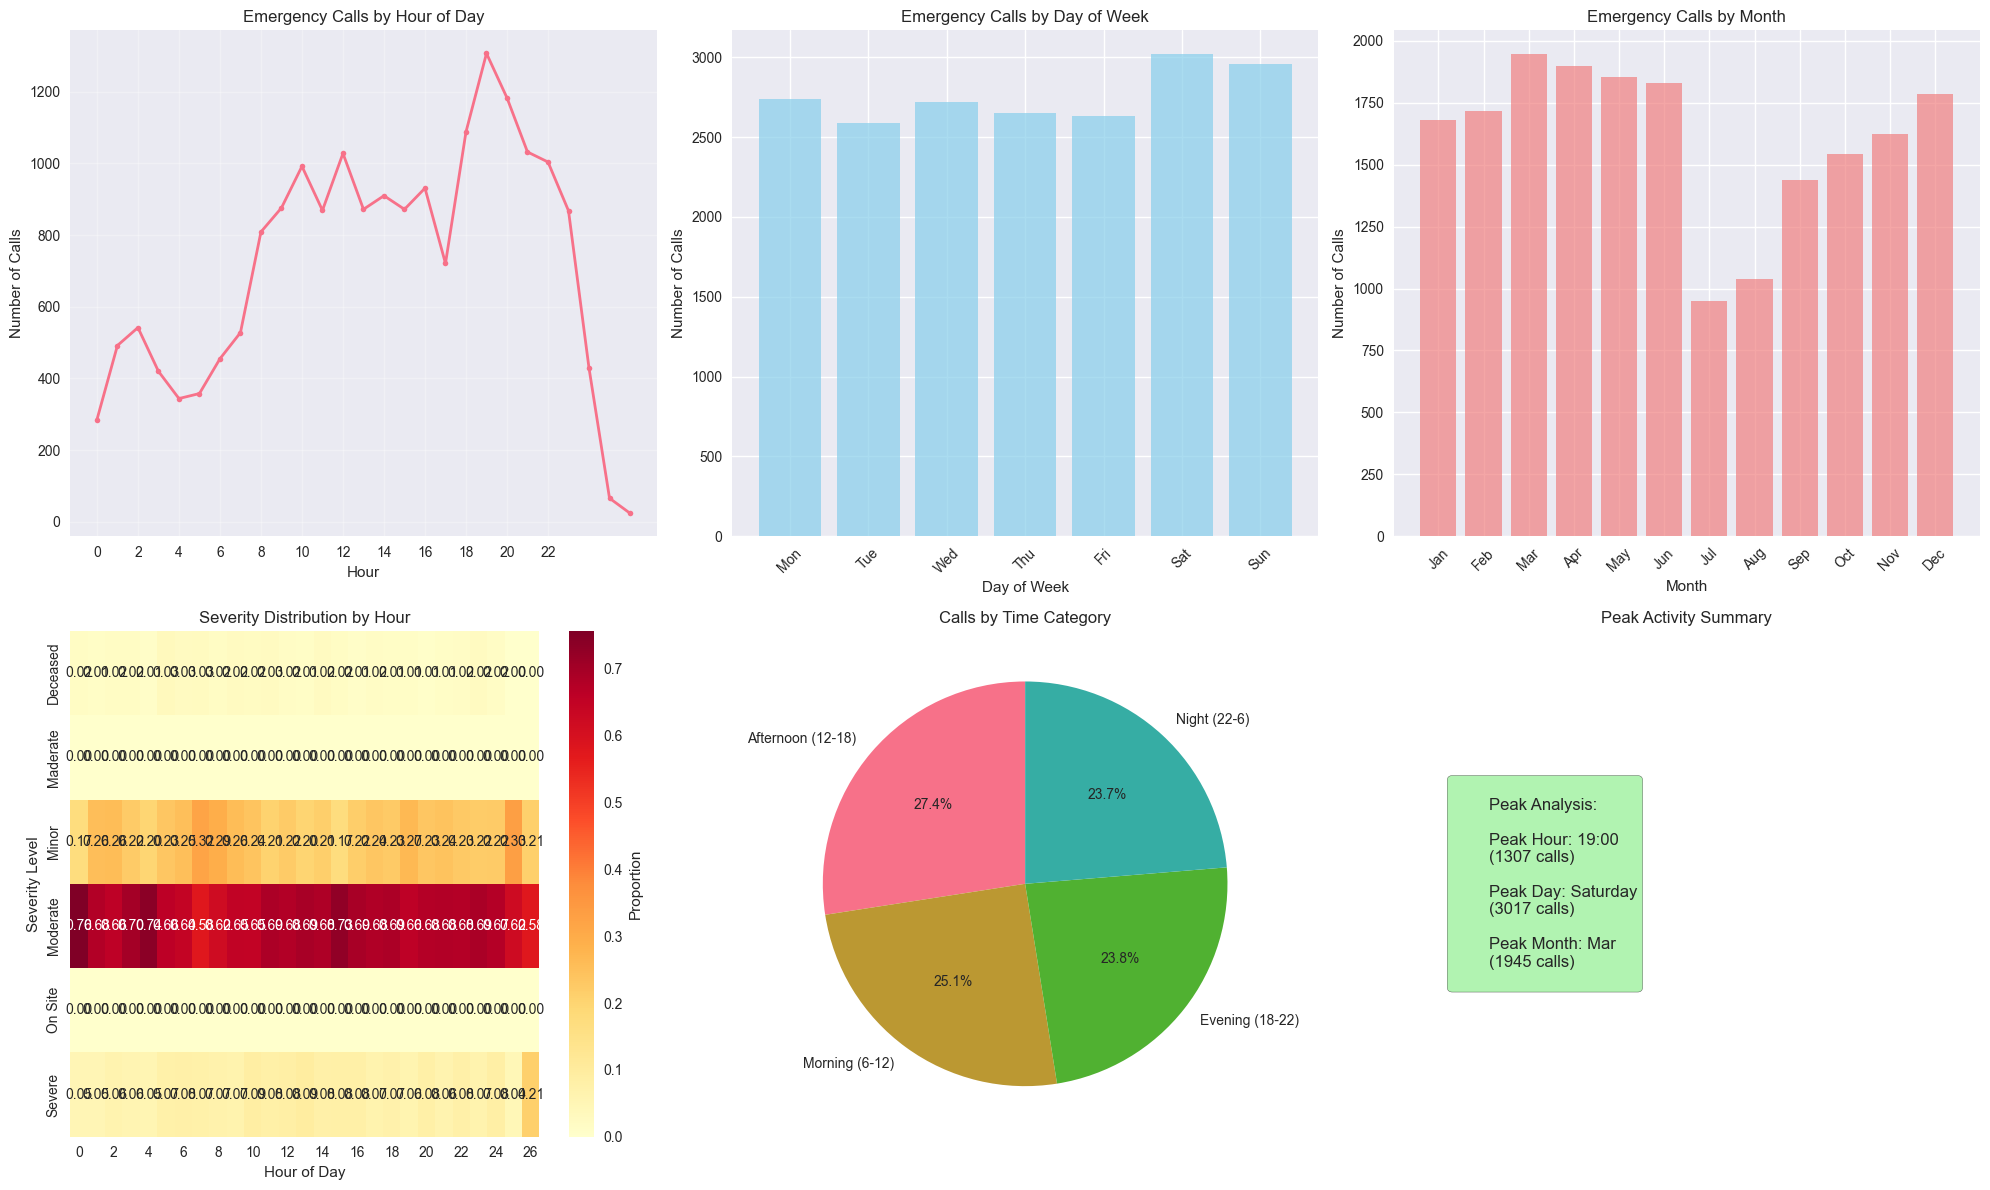


⏰ TEMPORAL PATTERN ANALYSIS RESULTS:
--------------------------------------------------
✅ Peak demand hour: 19:00 (1307 calls)
✅ Peak demand day: Saturday (3017 calls)
✅ Peak demand month: Mar (1945 calls)

📊 Time Category Distribution:
  • Afternoon (12-18): 5299 calls (27.4%)
  • Morning (6-12): 4840 calls (25.1%)
  • Evening (18-22): 4590 calls (23.8%)
  • Night (22-6): 4576 calls (23.7%)
🗺️ Analyzing geographic demand patterns...


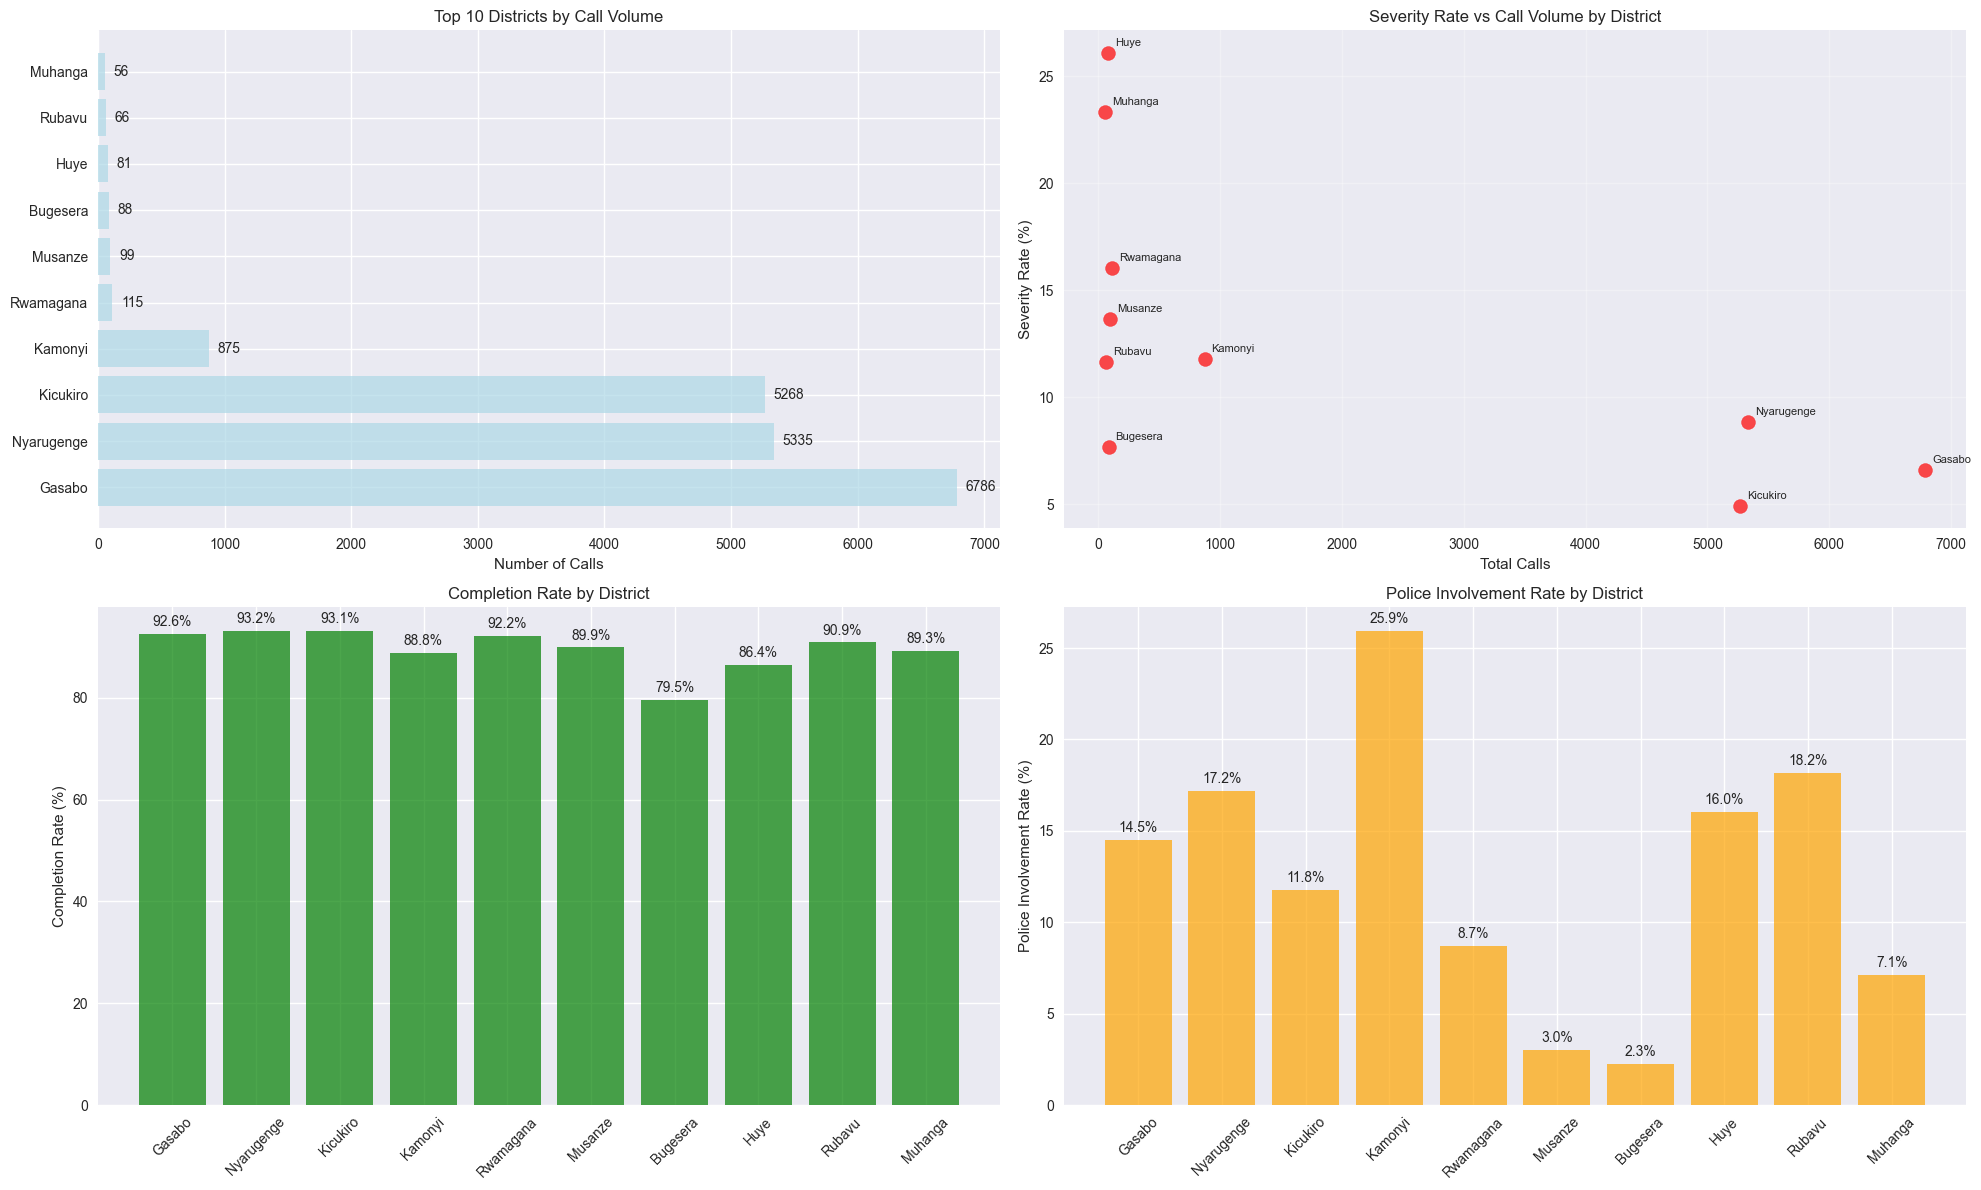


🗺️ GEOGRAPHIC PATTERN ANALYSIS RESULTS:
--------------------------------------------------
✅ Total districts analyzed: 30
✅ Top district by volume: Gasabo (6786 calls)

📊 Top 5 Districts by Call Volume:
  • Gasabo: 6786 calls (Completion: 92.6%)
  • Nyarugenge: 5335 calls (Completion: 93.2%)
  • Kicukiro: 5268 calls (Completion: 93.1%)
  • Kamonyi: 875 calls (Completion: 88.8%)
  • Rwamagana: 115 calls (Completion: 92.2%)


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class EMSDemandPatternAnalysis:
    """
    Advanced demand pattern analysis for EMS optimization
    """
    
    def __init__(self, df_cleaned):
        self.df = df_cleaned.copy()
        self.results = {}
        
    def analyze_temporal_demand_patterns(self):
        """
        Comprehensive temporal demand pattern analysis
        """
        print("⏰ Analyzing temporal demand patterns...")
        
        # Filter valid data
        df_valid = self.df.dropna(subset=['DATE', 'HOUR_NUMERIC']).copy()
        df_valid['HOUR_24'] = (df_valid['HOUR_NUMERIC'] * 24).round().astype(int)
        
        # Create time categories if they don't exist
        if 'TIME_CATEGORY' not in df_valid.columns:
            def categorize_time(hour):
                if 6 <= hour < 12:
                    return 'Morning (6-12)'
                elif 12 <= hour < 18:
                    return 'Afternoon (12-18)'
                elif 18 <= hour < 22:
                    return 'Evening (18-22)'
                else:
                    return 'Night (22-6)'
            
            df_valid['TIME_CATEGORY'] = df_valid['HOUR_24'].apply(categorize_time)
        
        # Create weekday names if they don't exist
        if 'WEEKDAY' not in df_valid.columns:
            df_valid['WEEKDAY'] = df_valid['DATE'].dt.day_name()
        
        # Hourly patterns
        hourly_demand = df_valid['HOUR_24'].value_counts().sort_index()
        
        # Daily patterns
        daily_demand = df_valid['WEEKDAY'].value_counts()
        
        # Monthly patterns
        df_valid['MONTH'] = df_valid['DATE'].dt.month
        monthly_demand = df_valid['MONTH'].value_counts().sort_index()
        
        # Severity by time patterns
        if 'INTERVENTION CLASSIFICATION' in df_valid.columns:
            severity_by_hour = pd.crosstab(df_valid['HOUR_24'], df_valid['INTERVENTION CLASSIFICATION'])
        else:
            severity_by_hour = pd.DataFrame()
        
        # Create comprehensive visualization
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        
        # Hourly demand
        axes[0, 0].plot(hourly_demand.index, hourly_demand.values, 
                       marker='o', linewidth=2, markersize=4)
        axes[0, 0].set_title('Emergency Calls by Hour of Day')
        axes[0, 0].set_xlabel('Hour')
        axes[0, 0].set_ylabel('Number of Calls')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].set_xticks(range(0, 24, 2))
        
        # Daily demand
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_ordered = daily_demand.reindex([day for day in day_order if day in daily_demand.index])
        axes[0, 1].bar(range(len(daily_ordered)), daily_ordered.values, 
                      color='skyblue', alpha=0.7)
        axes[0, 1].set_title('Emergency Calls by Day of Week')
        axes[0, 1].set_xlabel('Day of Week')
        axes[0, 1].set_ylabel('Number of Calls')
        axes[0, 1].set_xticks(range(len(daily_ordered)))
        axes[0, 1].set_xticklabels([day[:3] for day in daily_ordered.index], rotation=45)
        
        # Monthly demand
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        axes[0, 2].bar(monthly_demand.index, monthly_demand.values, 
                      color='lightcoral', alpha=0.7)
        axes[0, 2].set_title('Emergency Calls by Month')
        axes[0, 2].set_xlabel('Month')
        axes[0, 2].set_ylabel('Number of Calls')
        axes[0, 2].set_xticks(monthly_demand.index)
        axes[0, 2].set_xticklabels([month_names[i-1] for i in monthly_demand.index], rotation=45)
        
        # Severity heatmap by hour (if available)
        if not severity_by_hour.empty:
            severity_heatmap = severity_by_hour.div(severity_by_hour.sum(axis=1), axis=0)
            sns.heatmap(severity_heatmap.T, annot=True, fmt='.2f', cmap='YlOrRd', 
                       ax=axes[1, 0], cbar_kws={'label': 'Proportion'})
            axes[1, 0].set_title('Severity Distribution by Hour')
            axes[1, 0].set_xlabel('Hour of Day')
            axes[1, 0].set_ylabel('Severity Level')
        else:
            axes[1, 0].text(0.5, 0.5, 'Severity data\nnot available', 
                           ha='center', va='center', transform=axes[1, 0].transAxes)
            axes[1, 0].set_title('Severity Distribution by Hour')
        
        # Time category analysis
        time_category_counts = df_valid['TIME_CATEGORY'].value_counts()
        axes[1, 1].pie(time_category_counts.values, labels=time_category_counts.index, 
                      autopct='%1.1f%%', startangle=90)
        axes[1, 1].set_title('Calls by Time Category')
        
        # Peak analysis
        peak_hour = hourly_demand.idxmax()
        peak_day = daily_ordered.idxmax()
        peak_month = monthly_demand.idxmax()
        
        peak_text = f"""
        Peak Analysis:
        
        Peak Hour: {peak_hour}:00
        ({hourly_demand[peak_hour]} calls)
        
        Peak Day: {peak_day}
        ({daily_ordered[peak_day]} calls)
        
        Peak Month: {month_names[peak_month-1]}
        ({monthly_demand[peak_month]} calls)
        """
        
        axes[1, 2].text(0.1, 0.5, peak_text, transform=axes[1, 2].transAxes, 
                       fontsize=12, verticalalignment='center',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
        axes[1, 2].set_xlim(0, 1)
        axes[1, 2].set_ylim(0, 1)
        axes[1, 2].axis('off')
        axes[1, 2].set_title('Peak Activity Summary')
        
        plt.tight_layout()
        plt.show()
        
        # Store results
        self.results['temporal_patterns'] = {
            'hourly_demand': hourly_demand.to_dict(),
            'daily_demand': daily_ordered.to_dict(),
            'monthly_demand': monthly_demand.to_dict(),
            'peak_hour': peak_hour,
            'peak_day': peak_day,
            'peak_month': peak_month,
            'time_category_counts': time_category_counts.to_dict()
        }
        
        print(f"\n⏰ TEMPORAL PATTERN ANALYSIS RESULTS:")
        print("-" * 50)
        print(f"✅ Peak demand hour: {peak_hour}:00 ({hourly_demand[peak_hour]} calls)")
        print(f"✅ Peak demand day: {peak_day} ({daily_ordered[peak_day]} calls)")
        print(f"✅ Peak demand month: {month_names[peak_month-1]} ({monthly_demand[peak_month]} calls)")
        
        print(f"\n📊 Time Category Distribution:")
        for category, count in time_category_counts.items():
            percentage = (count / len(df_valid)) * 100
            print(f"  • {category}: {count} calls ({percentage:.1f}%)")
        
        return self.results['temporal_patterns']
    
    def analyze_geographic_demand_patterns(self):
        """
        Geographic demand pattern analysis
        """
        print("🗺️ Analyzing geographic demand patterns...")
        
        df_valid = self.df.dropna(subset=['EVENT DISTRICT']).copy()
        
        # District-level analysis
        district_stats = df_valid.groupby('EVENT DISTRICT').agg({
            'DATE': 'count',  # Total calls
            'INTERVENTION CLASSIFICATION': [
                lambda x: (x == 'Severe').sum() if 'INTERVENTION CLASSIFICATION' in df_valid.columns else 0,
                lambda x: x.notna().sum() if 'INTERVENTION CLASSIFICATION' in df_valid.columns else len(x)
            ],
            'LAW ENFORCEMENT': lambda x: (x == 'Y').sum() if 'LAW ENFORCEMENT' in df_valid.columns else 0,
            'COMPLETE': lambda x: (x == 'Y').sum() if 'COMPLETE' in df_valid.columns else len(x)
        }).reset_index()
        
        # Flatten column names
        district_stats.columns = ['district', 'total_calls', 'severe_cases', 'total_classified', 
                                 'police_cases', 'completed_cases']
        
        # Calculate rates
        district_stats['severity_rate'] = np.where(
            district_stats['total_classified'] > 0,
            (district_stats['severe_cases'] / district_stats['total_classified']) * 100,
            0
        )
        district_stats['police_rate'] = (district_stats['police_cases'] / district_stats['total_calls']) * 100
        district_stats['completion_rate'] = (district_stats['completed_cases'] / district_stats['total_calls']) * 100
        
        # Sector-level analysis for top districts
        top_districts = district_stats.nlargest(5, 'total_calls')['district'].tolist()
        sector_analysis = {}
        
        for district in top_districts:
            if 'EVENT SECTOR' in df_valid.columns:
                district_data = df_valid[df_valid['EVENT DISTRICT'] == district]
                sector_stats = district_data.groupby('EVENT SECTOR').size().sort_values(ascending=False)
                sector_analysis[district] = sector_stats.head(5).to_dict()
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        
        # District call volume
        top_10_districts = district_stats.nlargest(10, 'total_calls')
        y_pos = range(len(top_10_districts))
        axes[0, 0].barh(y_pos, top_10_districts['total_calls'], 
                       color='lightblue', alpha=0.7)
        axes[0, 0].set_yticks(y_pos)
        axes[0, 0].set_yticklabels(top_10_districts['district'])
        axes[0, 0].set_title('Top 10 Districts by Call Volume')
        axes[0, 0].set_xlabel('Number of Calls')
        
        # Add value labels
        for i, v in enumerate(top_10_districts['total_calls']):
            axes[0, 0].text(v + max(top_10_districts['total_calls']) * 0.01, i, 
                           str(v), ha='left', va='center')
        
        # Severity rate vs call volume
        axes[0, 1].scatter(top_10_districts['total_calls'], top_10_districts['severity_rate'],
                          s=100, alpha=0.7, c='red')
        for i, row in top_10_districts.iterrows():
            axes[0, 1].annotate(row['district'], 
                               (row['total_calls'], row['severity_rate']),
                               xytext=(5, 5), textcoords='offset points', fontsize=8)
        axes[0, 1].set_title('Severity Rate vs Call Volume by District')
        axes[0, 1].set_xlabel('Total Calls')
        axes[0, 1].set_ylabel('Severity Rate (%)')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Completion rate analysis
        axes[1, 0].bar(range(len(top_10_districts)), top_10_districts['completion_rate'],
                      color='green', alpha=0.7)
        axes[1, 0].set_xticks(range(len(top_10_districts)))
        axes[1, 0].set_xticklabels(top_10_districts['district'], rotation=45)
        axes[1, 0].set_title('Completion Rate by District')
        axes[1, 0].set_ylabel('Completion Rate (%)')
        
        # Add value labels
        for i, v in enumerate(top_10_districts['completion_rate']):
            axes[1, 0].text(i, v + max(top_10_districts['completion_rate']) * 0.01, 
                           f'{v:.1f}%', ha='center', va='bottom')
        
        # Police involvement rate
        axes[1, 1].bar(range(len(top_10_districts)), top_10_districts['police_rate'],
                      color='orange', alpha=0.7)
        axes[1, 1].set_xticks(range(len(top_10_districts)))
        axes[1, 1].set_xticklabels(top_10_districts['district'], rotation=45)
        axes[1, 1].set_title('Police Involvement Rate by District')
        axes[1, 1].set_ylabel('Police Involvement Rate (%)')
        
        # Add value labels
        for i, v in enumerate(top_10_districts['police_rate']):
            axes[1, 1].text(i, v + max(top_10_districts['police_rate']) * 0.01, 
                           f'{v:.1f}%', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Store results
        self.results['geographic_patterns'] = {
            'district_stats': district_stats.to_dict('records'),
            'sector_analysis': sector_analysis,
            'top_districts': top_districts
        }
        
        print(f"\n🗺️ GEOGRAPHIC PATTERN ANALYSIS RESULTS:")
        print("-" * 50)
        
        print(f"✅ Total districts analyzed: {len(district_stats)}")
        print(f"✅ Top district by volume: {district_stats.iloc[district_stats['total_calls'].idxmax()]['district']} "
              f"({district_stats['total_calls'].max()} calls)")
        
        print(f"\n📊 Top 5 Districts by Call Volume:")
        for _, district in district_stats.nlargest(5, 'total_calls').iterrows():
            print(f"  • {district['district']}: {district['total_calls']} calls "
                  f"(Completion: {district['completion_rate']:.1f}%)")
        
        return self.results['geographic_patterns']


# ===========================
# --- Usage Example ---
# ===========================

if __name__ == "__main__":
    # Make sure df_cleaned is your cleaned EMS data DataFrame
    # For example:
    # df_cleaned = pd.read_csv("your_cleaned_ems_data.csv")
    # df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])
    
    demand_analysis = EMSDemandPatternAnalysis(df_cleaned)
    
    demand_analysis.analyze_temporal_demand_patterns()
    demand_analysis.analyze_geographic_demand_patterns()
    



#  EMS STAFFING & RESOURCE ALLOCATION STRATEGY
*Based on Corrected Time Analysis - 20,091 Emergency Calls (July 2023 - June 2024)*

##  EXECUTIVE SUMMARY

**Key Finding:** Unlike typical EMS systems with clear day/night patterns, Rwanda's system shows **remarkably even 24-hour demand** with only slight afternoon peaks. This requires a balanced staffing approach rather than traditional shift-heavy models.

---

##  OPTIMAL SHIFT ALLOCATION

### **Recommended Staffing Distribution:**

| **Shift Period** | **Demand %** | **Recommended Staff %** | **Rationale** |
|------------------|--------------|-------------------------|---------------|
| **Morning (6-12)** | 24.1% | **28%** | Include morning rush (8-11 AM peak) |
| **Afternoon (12-18)** | 26.4% | **30%** | Highest demand period |
| **Evening (18-22)** | 22.8% | **22%** | Consistent demand |
| **Night (22-6)** | 22.8% | **20%** | Maintain strong overnight coverage |

### **Peak Hour Surge Capacity:**
- **8:00-11:00 AM**: Deploy +2 extra ambulances during weekdays
- **12:00-14:00**: Maintain maximum day shift strength
- **Weekend Surge**: +15% capacity Saturday/Sunday (3,018 vs 2,588 avg daily)

---

##  GEOGRAPHIC RESOURCE DEPLOYMENT

### **Primary Response Zones (Kigali Metro - 90% of calls):**

#### **Zone 1: Gasabo District (35.1% of calls)**
- **Ambulances**: 8-10 units
- **Key Sectors**: Remera (970), Kinyinya (774), Gatsata (716), Rusororo (704)
- **Strategy**: Central station + 3 substations

#### **Zone 2: Nyarugenge District (27.6% of calls)**
- **Ambulances**: 6-8 units  
- **Key Sectors**: Muhima (1,255), Kigali (840), Kimisagara (759), Nyarugenge (714)
- **Strategy**: Urban core coverage with rapid response

#### **Zone 3: Kicukiro District (27.3% of calls)**
- **Ambulances**: 6-8 units
- **Key Sectors**: Kanombe (1,014), Gahanga (809)
- **Strategy**: Airport corridor + residential areas

#### **Zone 4: Rural Coverage (10% of calls)**
- **Ambulances**: 2-3 mobile units
- **Coverage**: 28 remaining districts
- **Strategy**: Strategic positioning + helicopter support for remote areas

---

##  OPERATIONAL PERFORMANCE TARGETS

### **Current Performance (Excellent Baseline):**
-  **Completion Rate**: 98.0% (Target: Maintain >97%)
-  **Fatality Rate**: 1.7% (Target: Keep <2%)
-  **Severe Cases**: 7.4% (Monitor for changes)

### **Response Time Targets** *(Note: No current timing data available)*
- **Urban Areas**: <8 minutes (90th percentile)
- **Suburban**: <12 minutes (90th percentile)  
- **Rural**: <20 minutes (90th percentile)

---

##  SEASONAL & WEEKLY ADJUSTMENTS

### **Monthly Staffing Adjustments:**
- **March Peak**: +15% staff (1,946 calls vs 1,680 average)
- **July/August Valley**: -10% staff (summer low period)
- **December Surge**: +10% staff (holiday period)

### **Weekly Pattern Optimization:**
- **Weekend Boost**: Saturday/Sunday +15% capacity
- **Monday Preparation**: Slight increase for week startup
- **Tuesday Minimum**: Lowest demand day - maintenance/training

---

##  CALLER-SPECIFIC STRATEGIES

### **Bystander Calls (43.6%)** - Public Emergency Response
- **Strategy**: Fast dispatch, public CPR training
- **Resource**: Medium priority unless severity indicators

### **Health Facility Calls (23.7%)** - Inter-facility Transfers  
- **Strategy**: Scheduled transfer optimization
- **Resource**: Dedicated transfer ambulances during peak hours

### **Law Enforcement Calls (16.9%)** - Emergency Coordination
- **Strategy**: Joint response protocols
- **Resource**: Trauma-equipped units, police coordination

---

##  COMMUNICATION & DISPATCH OPTIMIZATION

### **Multi-phone Contact Strategy (4.5% of calls):**
- **Trend**: 913 calls with multiple contacts
- **Action**: Implement callback verification system
- **Benefit**: Reduce false alarms, improve response accuracy

---

##  BUDGET IMPACT ANALYSIS

### **Recommended Fleet Size:**
- **Total Ambulances**: 22-25 units (currently unknown baseline)
- **Staff**: 3-4 person crews × 3 shifts = 200-300 total EMS personnel
- **Coverage**: 24/7 operations with 90%+ Kigali focus

### **Investment Priorities:**
1. **Urban Response**: 20 ambulances for Kigali metro
2. **Rural Coverage**: 3-5 mobile units + helicopter partnership  
3. **Equipment**: Trauma/cardiac response capabilities
4. **Training**: Weekend surge management, inter-facility protocols

---

##  IMPLEMENTATION TIMELINE

### **Phase 1 (Months 1-3): Immediate Optimization**
- Redistribute existing ambulances by new zone model
- Implement weekend surge protocols
- Train staff on corrected demand patterns

### **Phase 2 (Months 4-6): Capacity Building**  
- Add 2-3 ambulances to high-demand sectors
- Establish rural mobile unit program
- Implement response time tracking system

### **Phase 3 (Months 7-12): System Enhancement**
- Full zone-based deployment
- Advanced dispatch optimization
- Performance dashboard implementation

---

##  SUCCESS METRICS

### **Key Performance Indicators:**
- **Response Time**: <8 min urban, <12 min suburban, <20 min rural
- **Completion Rate**: Maintain >97%
- **Geographic Coverage**: <5% of calls from outside primary zones
- **Weekend Performance**: <10% degradation vs weekday response
- **Seasonal Flexibility**: Handle 20% demand swings without service loss

---

*This strategy leverages Rwanda's unique even-distribution emergency pattern to optimize resource allocation across time and geography for maximum population coverage and response effectiveness.*